# LOADING PACKAGES

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, levene, ttest_ind, kruskal, shapiro
import pprint
import scipy.stats as stats
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
path = "D://TRAININGS//FORMATION RISK//SCORE OCTROI//data//"

data = pd.read_csv(path+'data.csv')
data

LIMIT_BAL  SEX EDUCATION MARRIAGE  AGE         PAY_0         PAY_2  \
0        20000.0    2         2        1   24  Late_payment  Late_payment   
1       120000.0    2         2        2   26      Pay_duly  Late_payment   
2        90000.0    2         2        2   34      Pay_duly      Pay_duly   
3        50000.0    2         2        1   37      Pay_duly      Pay_duly   
4        50000.0    1         2        1   57      Pay_duly      Pay_duly   
...          ...  ...       ...      ...  ...           ...           ...   
29995   220000.0    1         3        1   39      Pay_duly      Pay_duly   
29996   150000.0    1         3        2   43      Pay_duly      Pay_duly   
29997    30000.0    1         2        2   37  Late_payment  Late_payment   
29998    80000.0    1         3        1   41  Late_payment      Pay_duly   
29999    50000.0    1         2        1   46      Pay_duly      Pay_duly   

              PAY_3     PAY_4     PAY_5  ... BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0          Pay_duly  Pay_duly  Pay_duly  ...       0.0        0.0        0.0   
1          Pay_duly  Pay_duly  Pay_duly  ...    3272.0     3455.0     3261.0   
2          Pay_duly  Pay_duly  Pay_duly  ...   14331.0    14948.0    15549.0   
3          Pay_duly  Pay_duly  Pay_duly  ...   28314.0    28959.0    29547.0   
4          Pay_duly  Pay_duly  Pay_duly  ...   20940.0    19146.0    19131.0   
...             ...       ...       ...  ...       ...        ...        ...   
29995      Pay_duly  Pay_duly  Pay_duly  ...   88004.0    31237.0    15980.0   
29996      Pay_duly  Pay_duly  Pay_duly  ...    8979.0     5190.0        0.0   
29997  Late_payment  Pay_duly  Pay_duly  ...   20878.0    20582.0    19357.0   
29998      Pay_duly  Pay_duly  Pay_duly  ...   52774.0    11855.0    48944.0   
29999      Pay_duly  Pay_duly  Pay_duly  ...   36535.0    32428.0    15313.0   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0           0.0     689.0       0.0       0.0       0.0       0.0        1  
1           0.0    1000.0    1000.0    1000.0       0.0    2000.0        1  
2        1518.0    1500.0    1000.0    1000.0    1000.0    5000.0        0  
3        2000.0    2019.0    1200.0    1100.0    1069.0    1000.0        0  
4        2000.0   36681.0   10000.0    9000.0     689.0     679.0        0  
...         ...       ...       ...       ...       ...       ...      ...  
29995    8500.0   20000.0    5003.0    3047.0    5000.0    1000.0        0  
29996    1837.0    3526.0    8998.0     129.0       0.0       0.0        0  
29997       0.0       0.0   22000.0    4200.0    2000.0    3100.0        1  
29998   85900.0    3409.0    1178.0    1926.0   52964.0    1804.0        1  
29999    2078.0    1800.0    1430.0    1000.0    1000.0    1000.0        1  

[30000 rows x 24 columns]

In [3]:
data.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0         object
PAY_2         object
PAY_3         object
PAY_4         object
PAY_5         object
PAY_6         object
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

In [4]:
for col in ["SEX", "DEFAULT"] : 
    data[col] = data[col].astype("str")

data.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0         object
PAY_2         object
PAY_3         object
PAY_4         object
PAY_5         object
PAY_6         object
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT       object
dtype: object

## Quantitative - Quantitative

In [5]:
numeric_vars = data.select_dtypes(include=['number'])

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_vars.corr(), annot=True, linewidth=.5)
plt.show()

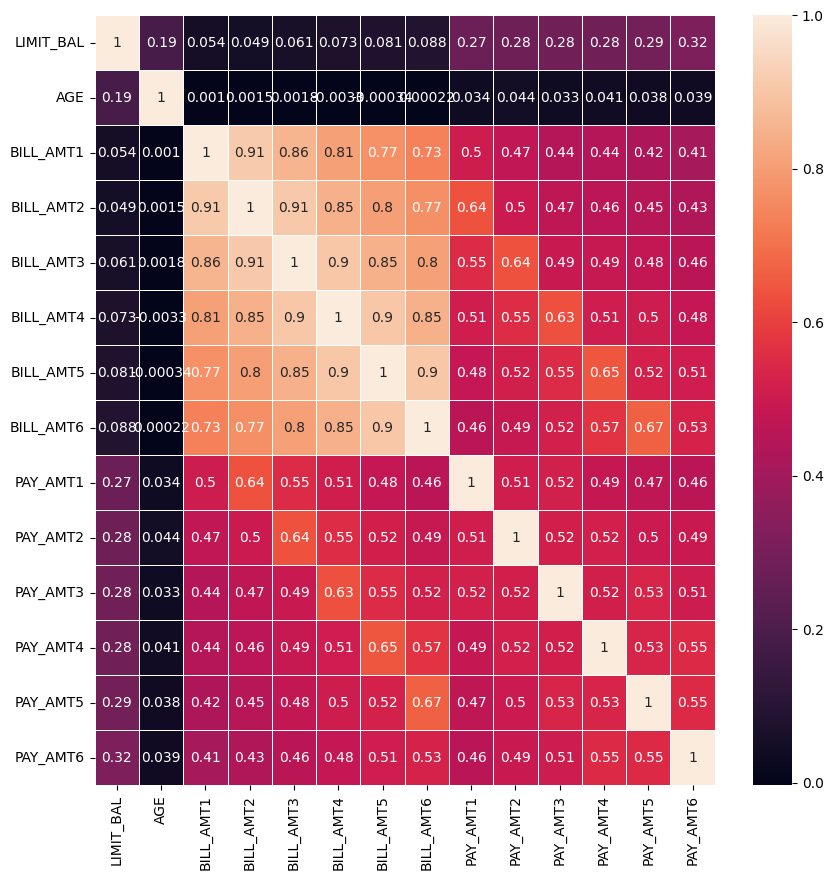

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_vars.corr(method = "spearman"), annot=True, linewidth=.5)
plt.show()

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_vars.corr(method="kendall"), annot=True, linewidth=.5)
plt.show()

***Comment :*** The correlations between variables BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5 and BILL_AMT6 are fairly high (over 80%).

## Qualitative - Qualitative

In [9]:
qual_vars = data.select_dtypes(include=['object'])
#qual_vars.drop("DEFAULT", axis=1, inplace=True)

for i in range(0, len(qual_vars.columns)):
    for j in range(0, len(qual_vars.columns)):
        if i < j : 
            print(f"Chi square test between {qual_vars.columns[i]} and {qual_vars.columns[j]}")
            print("\n")
            cross_tab = pd.crosstab(qual_vars[qual_vars.columns[i]], qual_vars[qual_vars.columns[j]], margins=True, margins_name="subtotal")
            chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab)
            #print(f"Chi-Square Statistic: {chi2_stat}")
            print(f"P-Value: {p_value}")
            #print(f"Degrees of Freedom: {dof}")
            #print(f"Expected Frequencies: \n{expected}")
            alpha = 0.05  # Significance level
            if p_value < alpha:
                print("Reject the null hypothesis: The variables are dependent.")
            else:
                print("Fail to reject the null hypothesis: The variables are independent.")
                
            print("NEXT")
            print("\n")


Chi square test between SEX and EDUCATION


P-Value: 0.0023688846387948295
Reject the null hypothesis: The variables are dependent.
NEXT


Chi square test between SEX and MARRIAGE


P-Value: 6.437675227791522e-05
Reject the null hypothesis: The variables are dependent.
NEXT


Chi square test between SEX and PAY_0


P-Value: 0.0010345566707028696
Reject the null hypothesis: The variables are dependent.
NEXT


Chi square test between SEX and PAY_2


P-Value: 3.0913366500678995e-10
Reject the null hypothesis: The variables are dependent.
NEXT


Chi square test between SEX and PAY_3


P-Value: 7.483703275116742e-09
Reject the null hypothesis: The variables are dependent.
NEXT


Chi square test between SEX and PAY_4


P-Value: 1.6304898245996677e-07
Reject the null hypothesis: The variables are dependent.
NEXT


Chi square test between SEX and PAY_5


P-Value: 5.498161081200064e-07
Reject the null hypothesis: The variables are dependent.
NEXT


Chi square test between SEX and PAY_6


P-Valu

***Comment :*** The variables are independent only between MARRIAGE and EDUCATION, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6.

In [10]:
## 2. Définition des fonctions

# Fonction pour calculer le V de Cramer
def cramers_v(conf_matrix):
    """Calcule le V de Cramer à partir d'une matrice de contingence."""
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    k = min(conf_matrix.shape) - 1
    return np.sqrt(chi2 / (n * k))

# Fonction pour calculer le T de Tschuprow
def tschuprow_t(conf_matrix):
    """Calcule le T de Tschuprow à partir d'une matrice de contingence."""
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    r, c = conf_matrix.shape
    return np.sqrt(chi2 / (n * np.sqrt((r - 1) * (c - 1))))


## 3. Création des heatmaps de corrélation

def categorical_correlation_heatmaps(df, categorical_columns):
    """
    Crée deux heatmaps de corrélation pour les variables catégorielles :
    - Une utilisant le V de Cramer.
    - Une utilisant le T de Tschuprow
    """
    n = len(categorical_columns)
    cramers_v_matrix = np.zeros((n, n))
    tschuprow_t_matrix = np.zeros((n, n))

    for i, var1 in enumerate(categorical_columns):
        for j, var2 in enumerate(categorical_columns):
            if i >= j:
                continue
            contingency_table = pd.crosstab(df[var1], df[var2])
            cramers_v_matrix[i, j] = cramers_v(contingency_table)
            tschuprow_t_matrix[i, j] = tschuprow_t(contingency_table)

    # Convertir en DataFrame pour affichage
    cramers_df = pd.DataFrame(cramers_v_matrix, index=categorical_columns, columns=categorical_columns)
    tschuprow_df = pd.DataFrame(tschuprow_t_matrix, index=categorical_columns, columns=categorical_columns)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cramers_df, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matrice de Corrélation des Variables Catégorielles (V de Cramer)")
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(tschuprow_df, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matrice de Corrélation des Variables Catégorielles (T de Tschuprow)")
    plt.show()


## 4. Génération des barplots et test du Khi-deux

def plot_categorical_relationships(df, categorical_columns):
    """
    Génère des barplots pour toutes les paires de variables catégorielles et réalise un test du Khi-deux.
    """
    for var1, var2 in combinations(categorical_columns, 2):
        contingency_table = pd.crosstab(df[var1], df[var2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        plt.figure(figsize=(8, 5))
        sns.countplot(x=var1, hue=var2, data=df)
        plt.title(f"{var1} vs {var2} (p-valeur du Khi-deux: {p:.4f})")
        plt.xlabel(var1)
        plt.ylabel("Effectifs")
        plt.legend(title=var2)
        plt.show()

        if p < 0.05:
            print(f"Relation significative entre {var1} et {var2} (p = {p:.4f}) -> Variables associées")
        else:
            print(f"Pas de relation significative entre {var1} et {var2} (p = {p:.4f}) -> Variables indépendantes")



Relation significative entre SEX et EDUCATION (p = 0.0000) -> Variables associées


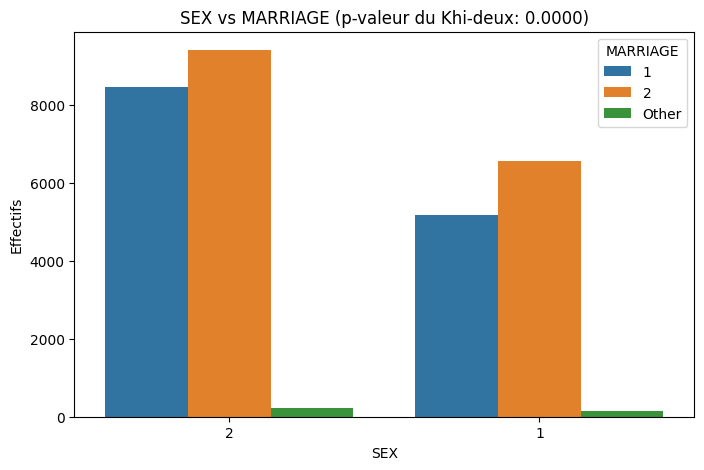

Relation significative entre SEX et MARRIAGE (p = 0.0000) -> Variables associées


Relation significative entre SEX et PAY_0 (p = 0.0000) -> Variables associées


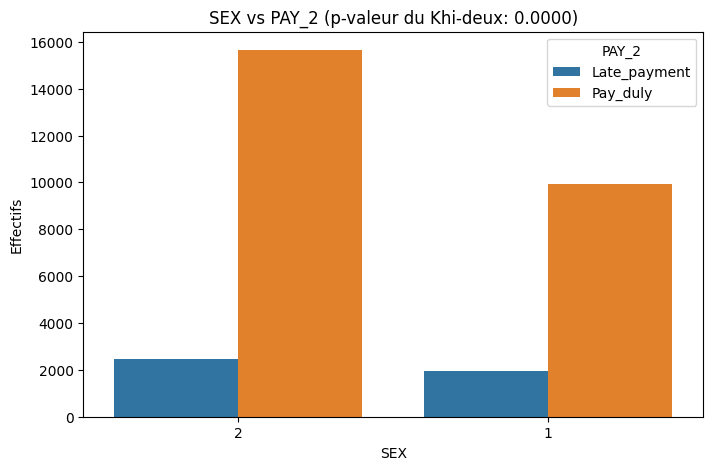

Relation significative entre SEX et PAY_2 (p = 0.0000) -> Variables associées


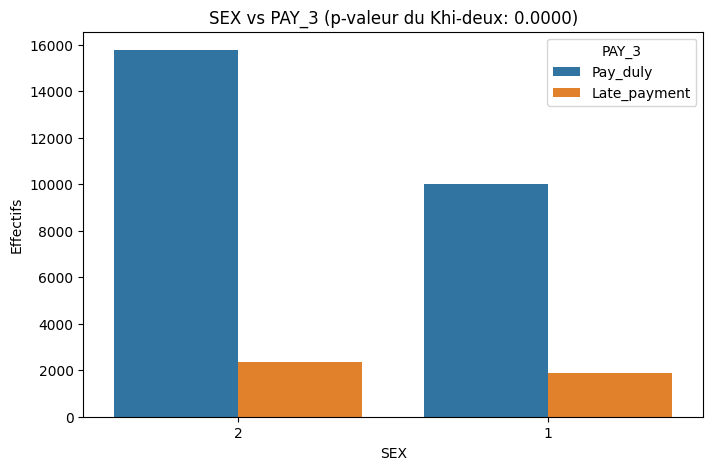

Relation significative entre SEX et PAY_3 (p = 0.0000) -> Variables associées


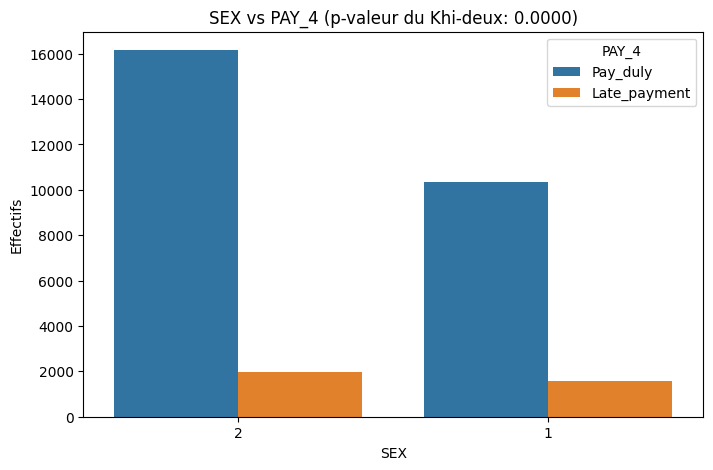

Relation significative entre SEX et PAY_4 (p = 0.0000) -> Variables associées


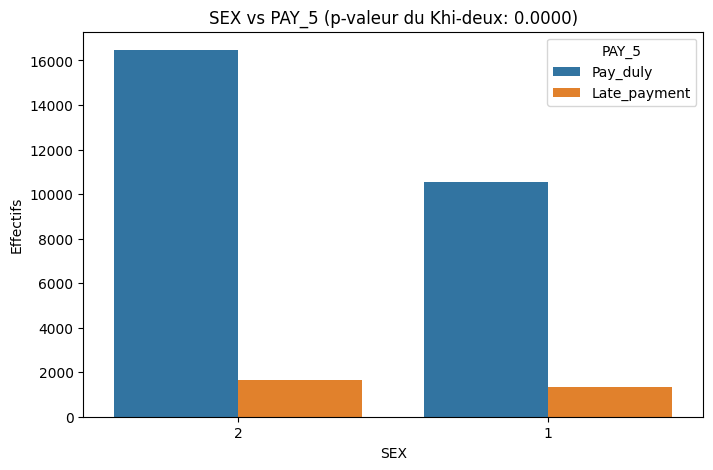

Relation significative entre SEX et PAY_5 (p = 0.0000) -> Variables associées


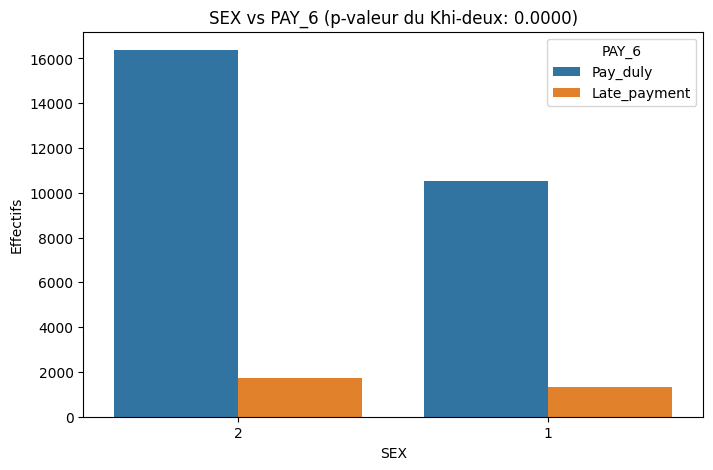

Relation significative entre SEX et PAY_6 (p = 0.0000) -> Variables associées


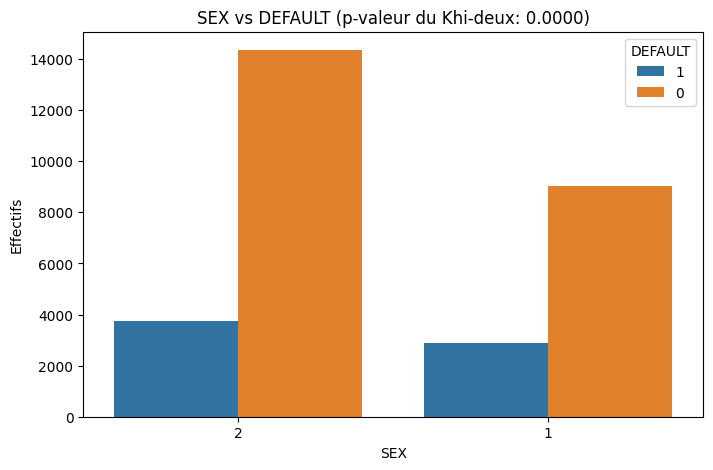

Relation significative entre SEX et DEFAULT (p = 0.0000) -> Variables associées


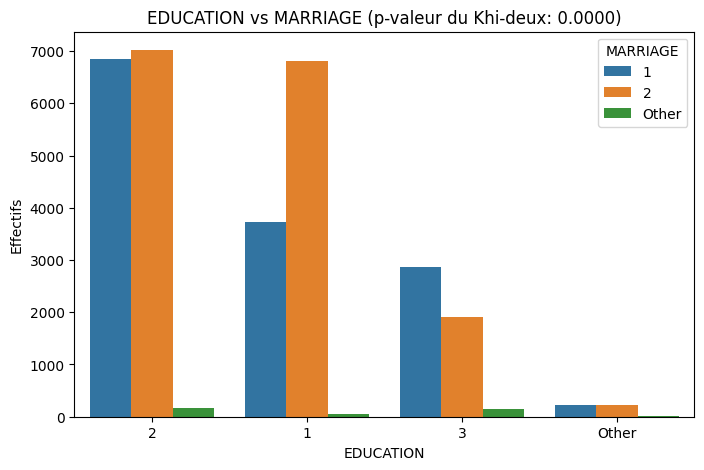

Relation significative entre EDUCATION et MARRIAGE (p = 0.0000) -> Variables associées


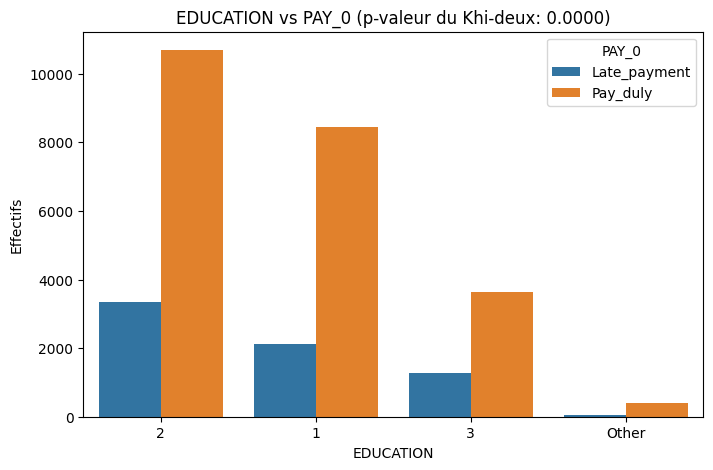

Relation significative entre EDUCATION et PAY_0 (p = 0.0000) -> Variables associées


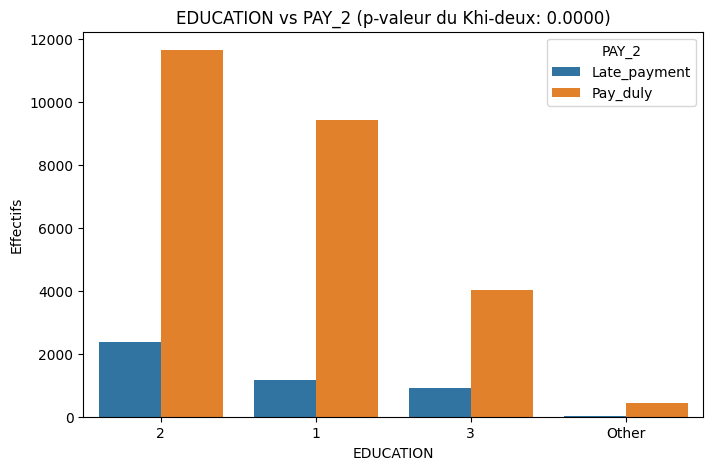

Relation significative entre EDUCATION et PAY_2 (p = 0.0000) -> Variables associées


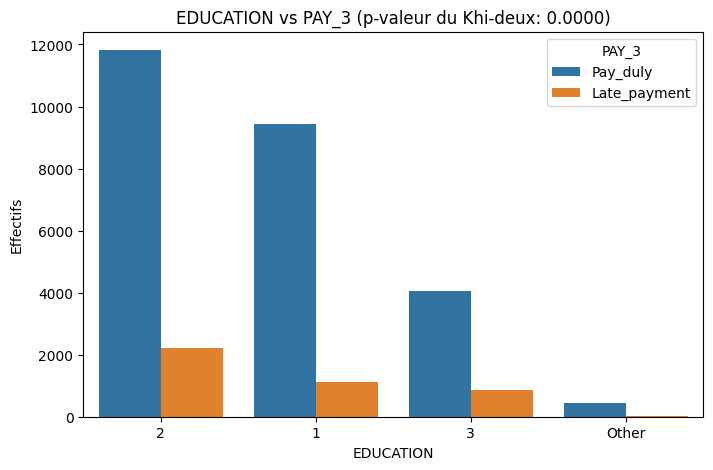

Relation significative entre EDUCATION et PAY_3 (p = 0.0000) -> Variables associées


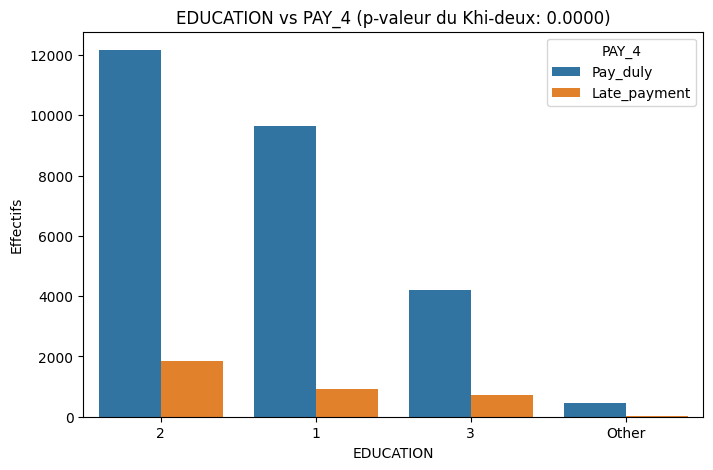

Relation significative entre EDUCATION et PAY_4 (p = 0.0000) -> Variables associées


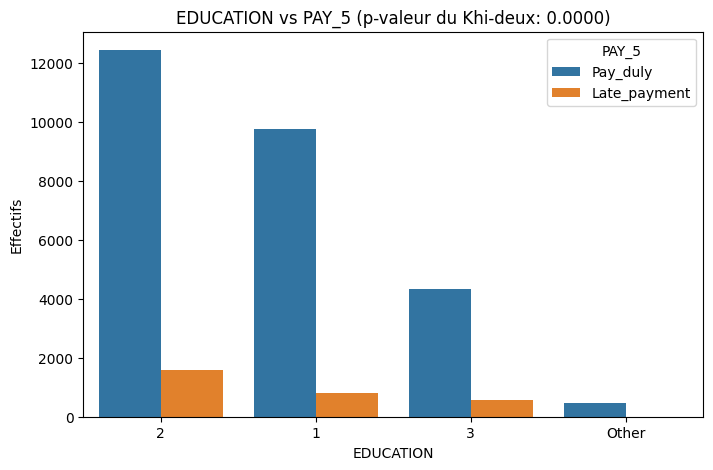

Relation significative entre EDUCATION et PAY_5 (p = 0.0000) -> Variables associées


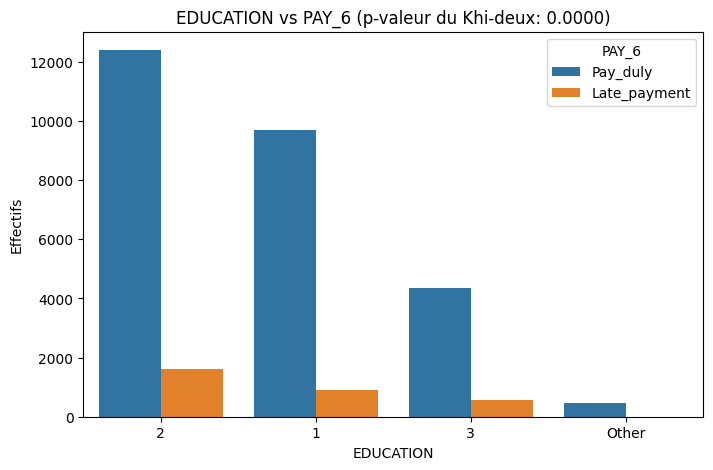

Relation significative entre EDUCATION et PAY_6 (p = 0.0000) -> Variables associées


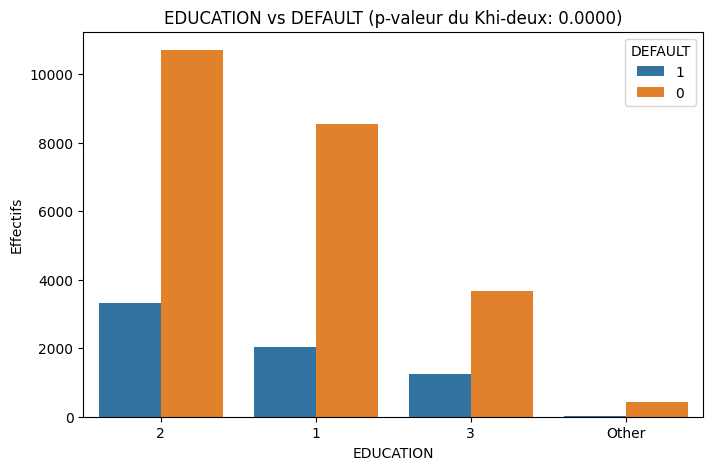

Relation significative entre EDUCATION et DEFAULT (p = 0.0000) -> Variables associées


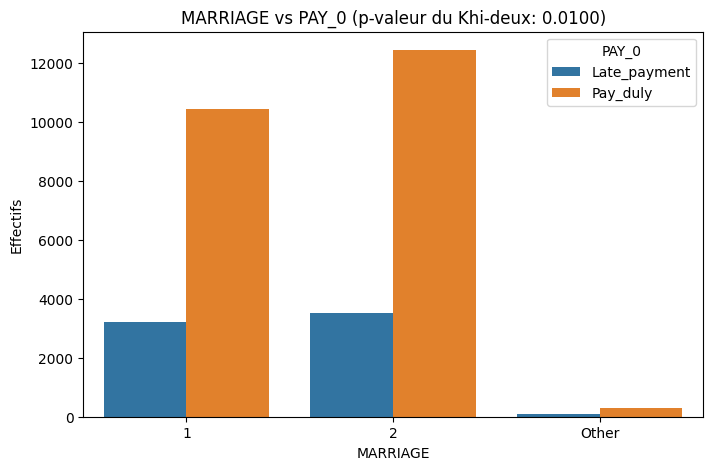

Relation significative entre MARRIAGE et PAY_0 (p = 0.0100) -> Variables associées


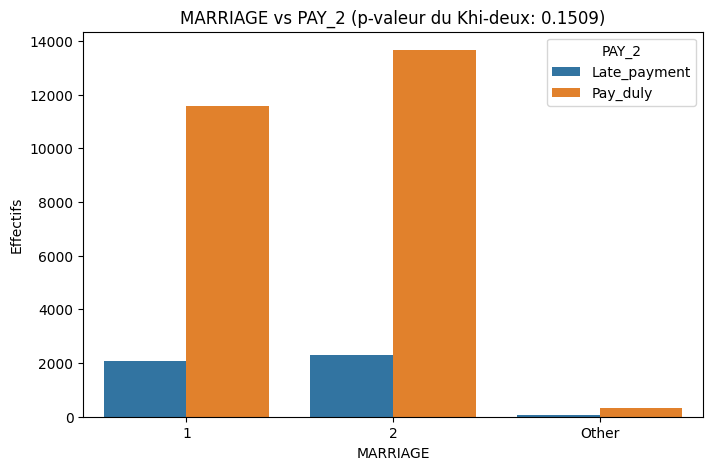

Pas de relation significative entre MARRIAGE et PAY_2 (p = 0.1509) -> Variables indépendantes


Pas de relation significative entre MARRIAGE et PAY_3 (p = 0.5539) -> Variables indépendantes


Pas de relation significative entre MARRIAGE et PAY_4 (p = 0.3403) -> Variables indépendantes


Pas de relation significative entre MARRIAGE et PAY_5 (p = 0.5036) -> Variables indépendantes


Pas de relation significative entre MARRIAGE et PAY_6 (p = 0.8567) -> Variables indépendantes


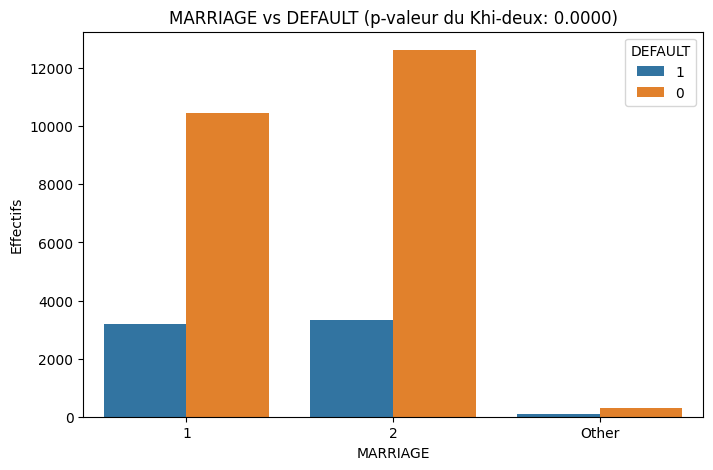

Relation significative entre MARRIAGE et DEFAULT (p = 0.0000) -> Variables associées


Relation significative entre PAY_0 et PAY_2 (p = 0.0000) -> Variables associées


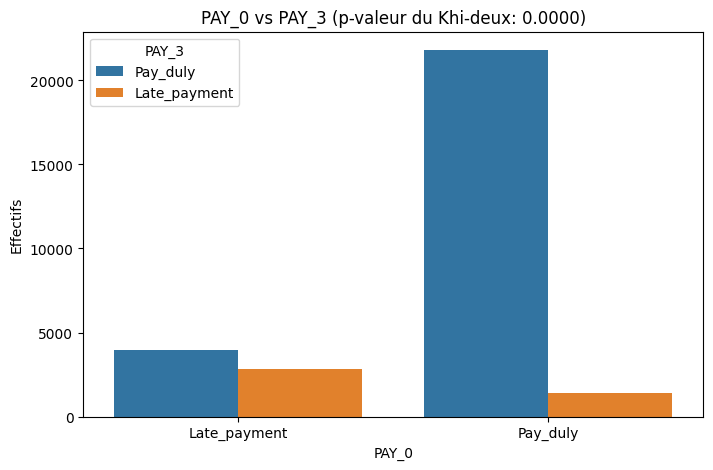

Relation significative entre PAY_0 et PAY_3 (p = 0.0000) -> Variables associées


Relation significative entre PAY_0 et PAY_4 (p = 0.0000) -> Variables associées


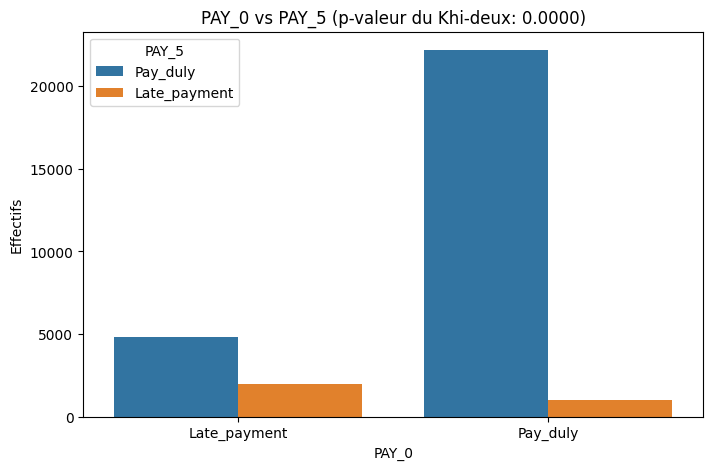

Relation significative entre PAY_0 et PAY_5 (p = 0.0000) -> Variables associées


Relation significative entre PAY_0 et PAY_6 (p = 0.0000) -> Variables associées


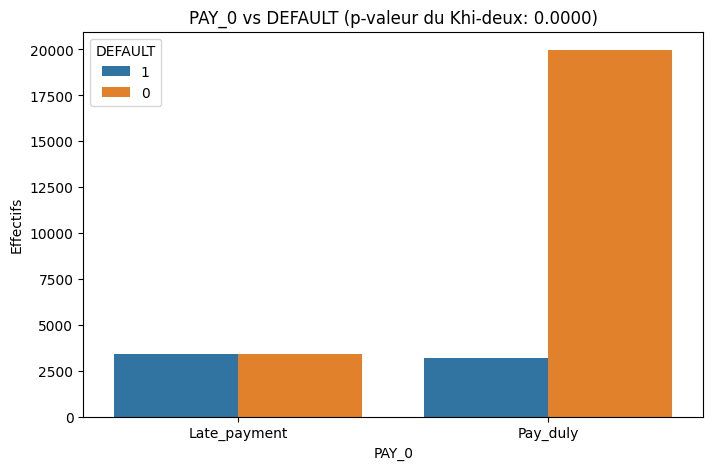

Relation significative entre PAY_0 et DEFAULT (p = 0.0000) -> Variables associées


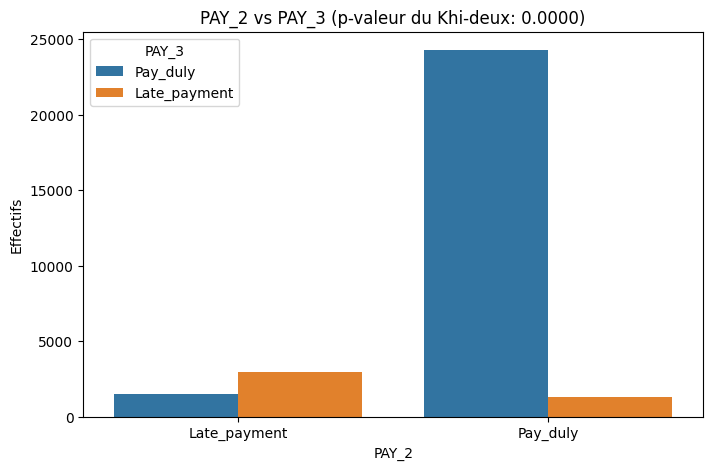

Relation significative entre PAY_2 et PAY_3 (p = 0.0000) -> Variables associées


Relation significative entre PAY_2 et PAY_4 (p = 0.0000) -> Variables associées


Relation significative entre PAY_2 et PAY_5 (p = 0.0000) -> Variables associées


Relation significative entre PAY_2 et PAY_6 (p = 0.0000) -> Variables associées


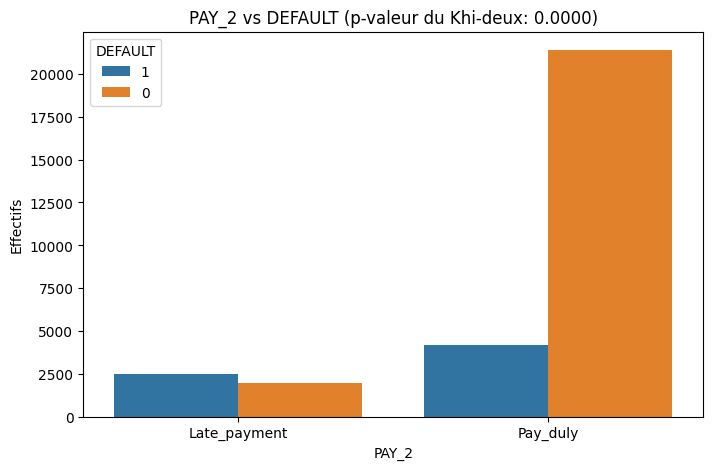

Relation significative entre PAY_2 et DEFAULT (p = 0.0000) -> Variables associées


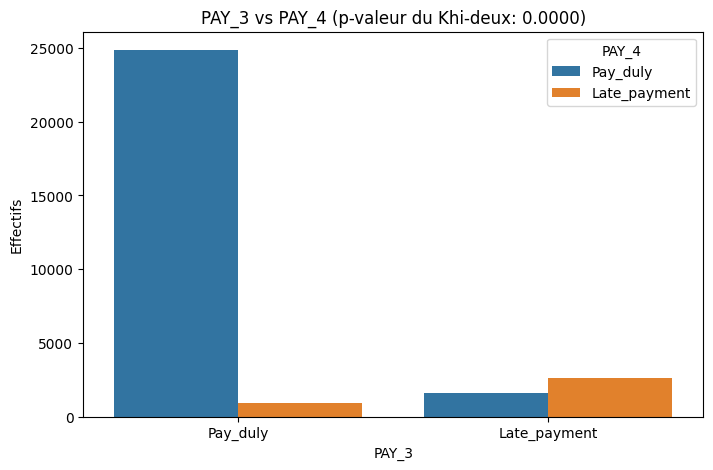

Relation significative entre PAY_3 et PAY_4 (p = 0.0000) -> Variables associées


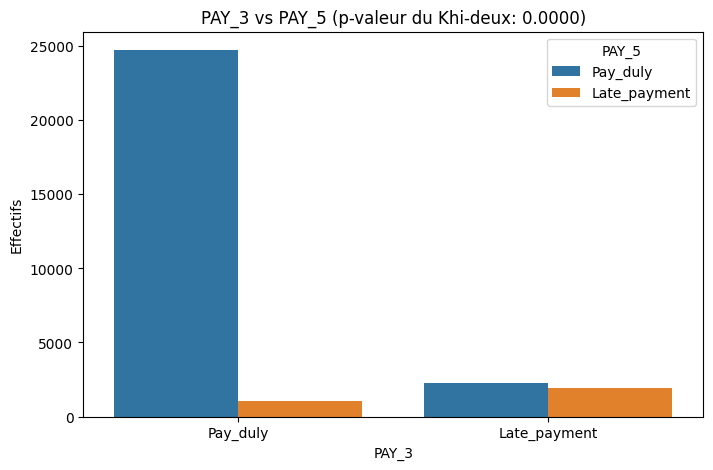

Relation significative entre PAY_3 et PAY_5 (p = 0.0000) -> Variables associées


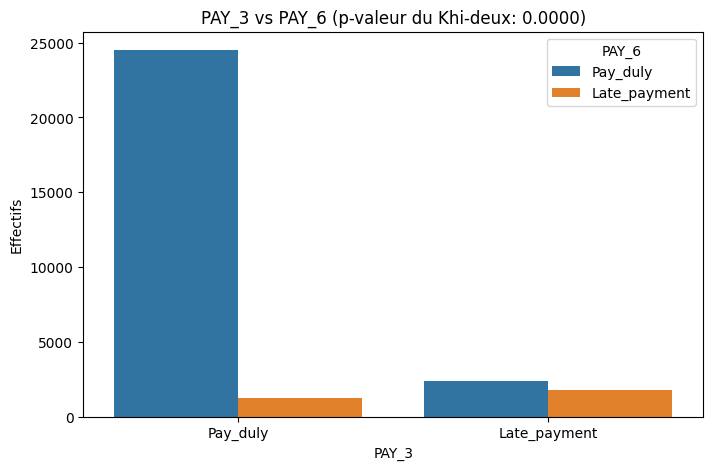

Relation significative entre PAY_3 et PAY_6 (p = 0.0000) -> Variables associées


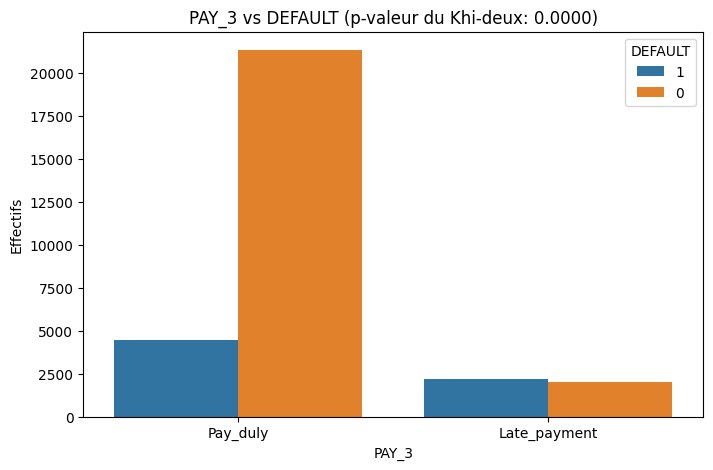

Relation significative entre PAY_3 et DEFAULT (p = 0.0000) -> Variables associées


Relation significative entre PAY_4 et PAY_5 (p = 0.0000) -> Variables associées


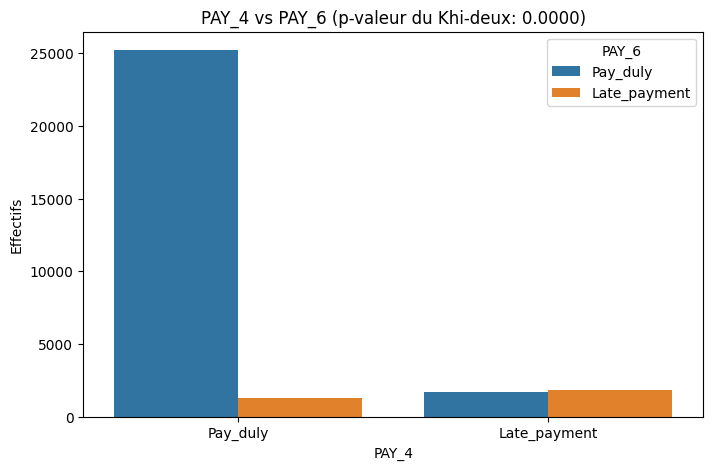

Relation significative entre PAY_4 et PAY_6 (p = 0.0000) -> Variables associées


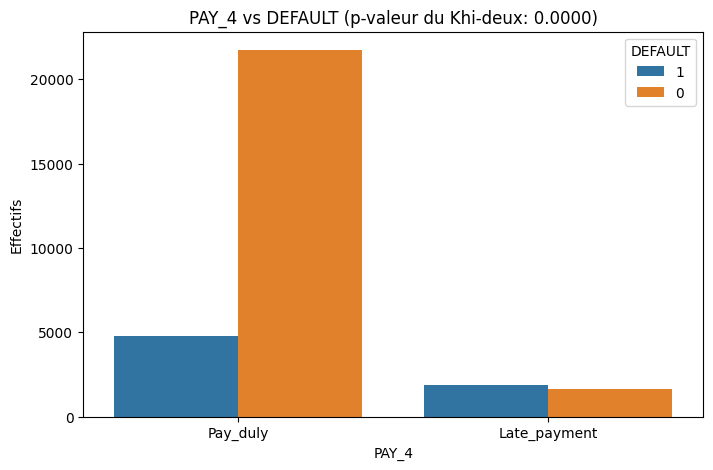

Relation significative entre PAY_4 et DEFAULT (p = 0.0000) -> Variables associées


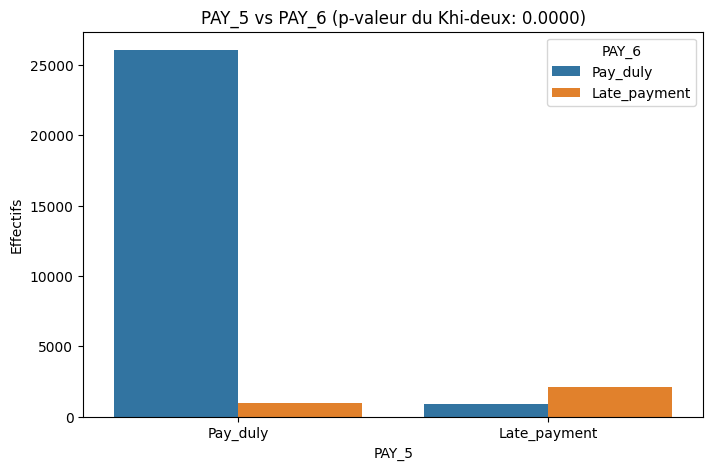

Relation significative entre PAY_5 et PAY_6 (p = 0.0000) -> Variables associées


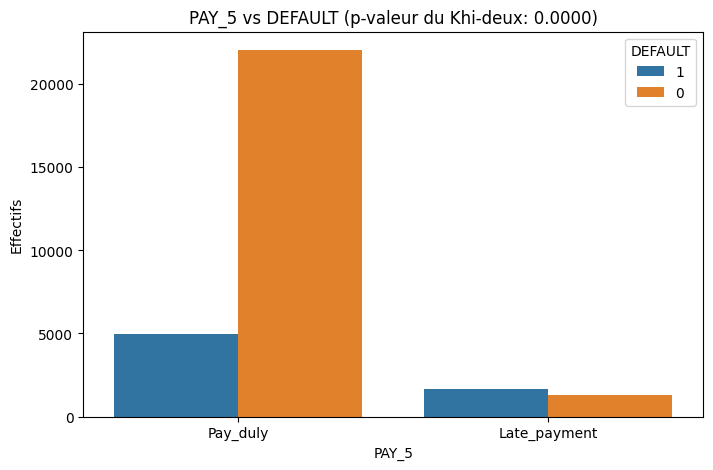

Relation significative entre PAY_5 et DEFAULT (p = 0.0000) -> Variables associées


Relation significative entre PAY_6 et DEFAULT (p = 0.0000) -> Variables associées


In [11]:
# Affichage des barplots et tests de Khi-deux
plot_categorical_relationships(data, qual_vars)

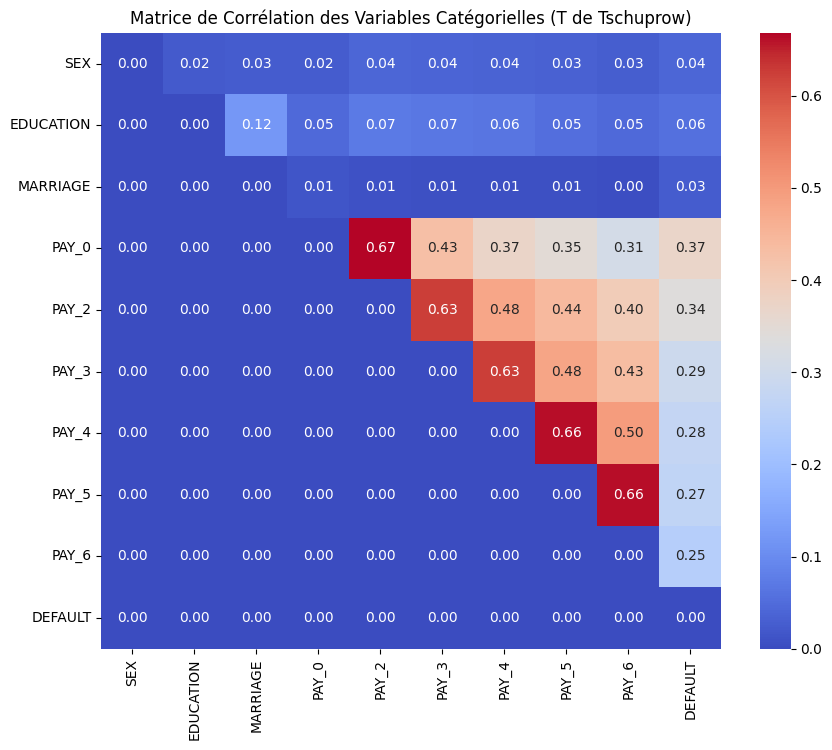

In [12]:
categorical_correlation_heatmaps(data, qual_vars.columns)

***Comment :*** The Cramer's V and Tschuprow's matrices confirm the results observed with the Chi 2 test carried out previously. The coefficients of association between the MARRIAGE variable and the other variables are the lowest, providing further evidence of independence between these variables. On the other hand, the coefficients of the PAY_0 to PAY_6 variables are higher, proving a stronger association.

### Quantitave - Qualitative

In [13]:
def quali_quanti_analysis(data, target):
    """
    Génère des boxplots et applique des tests statistiques entre
    variables qualitatives et quantitatives.
    """
    # Suppression de la variable ID si présente
    if 'ID' in data.columns:
        data = data.drop(columns=['ID'])

    # Sélection des variables
    numeric_vars = data.select_dtypes(include=['number'])
    categorical_vars = data.select_dtypes(include=['object'])

    results = []

    for cat in categorical_vars.columns:
        for num in numeric_vars.columns:
            plt.figure(figsize=(8, 5))
            sns.boxplot(x=data[cat], y=data[num], hue=data[cat], palette='viridis')
            plt.title(f"Boxplot de {num} en fonction de {cat}")
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.xticks(rotation=45)
            plt.show()

            # Test de normalité
            normal_test = shapiro(data[num].dropna())
            normal_pval = normal_test.pvalue

            # Test statistique adapté
            unique_vals = data[cat].nunique()
            if unique_vals == 2:
                test_stat, p_value = ttest_ind(data[num][data[cat] == data[cat].unique()[0]],
                                               data[num][data[cat] == data[cat].unique()[1]],
                                               nan_policy='omit')
                test_used = "T-test"
            elif unique_vals > 2:
                test_stat, p_value = kruskal(*[data[num][data[cat] == val] for val in data[cat].unique()])
                test_used = "Kruskal-Wallis"
            else:
                continue

            results.append([cat, num, test_used, p_value, normal_pval])

    # Tableau des résultats
    results_df = pd.DataFrame(results, columns=["Variable Catégorielle", "Variable Quantitative", "Test Utilisé", "p-valeur", "p-valeur Normalité"])
    return results_df.sort_values(by="p-valeur", ascending=True)

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


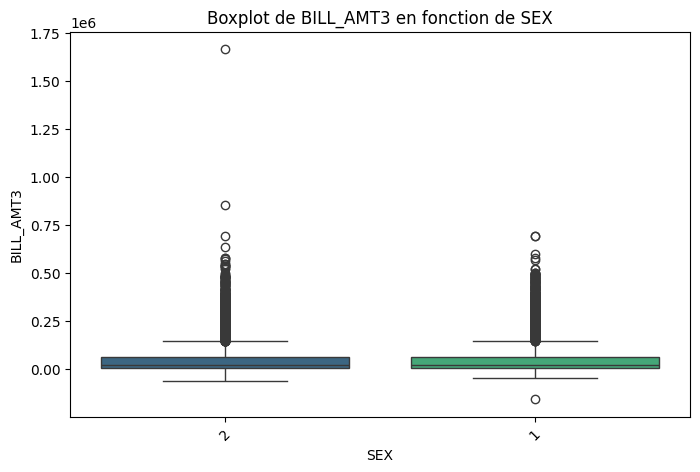

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


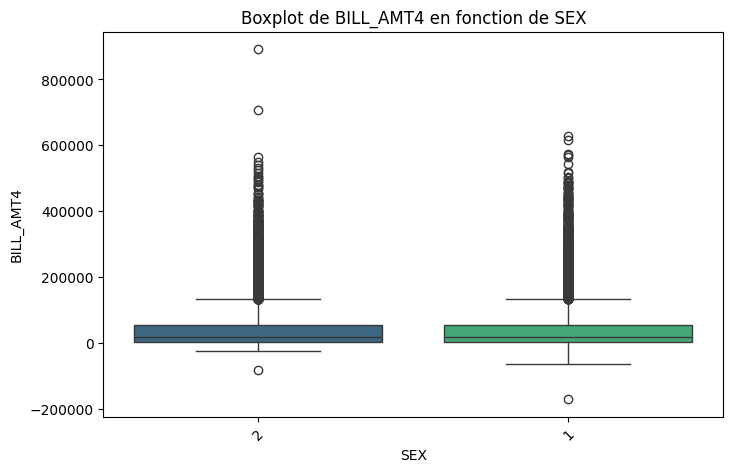

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


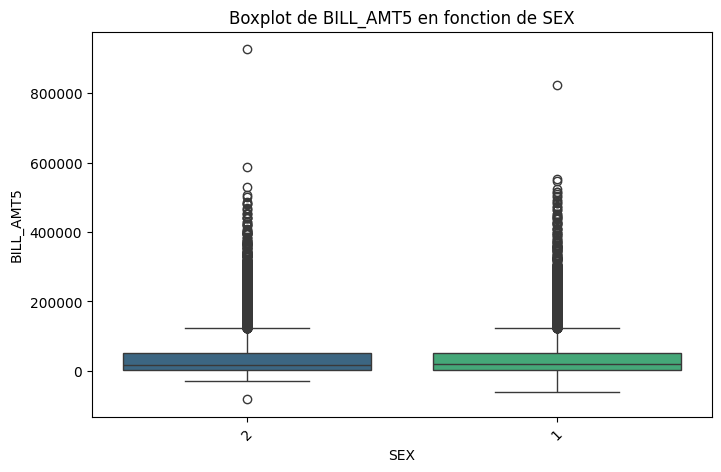

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


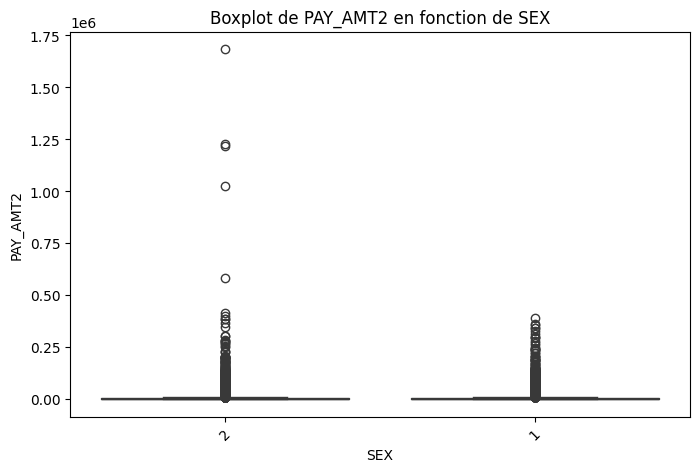

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


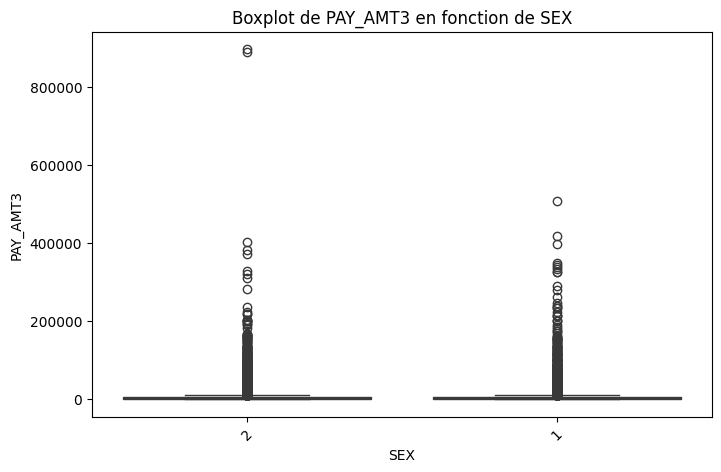

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


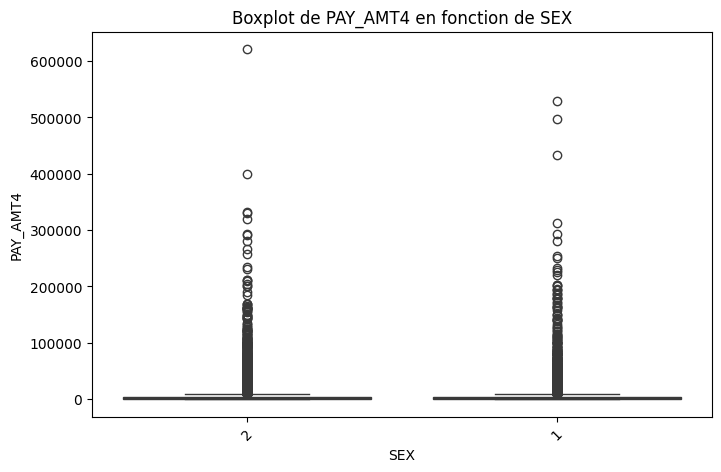

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


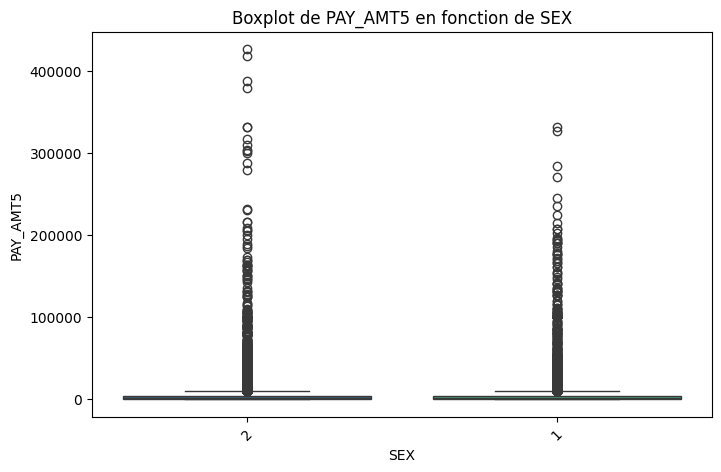

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


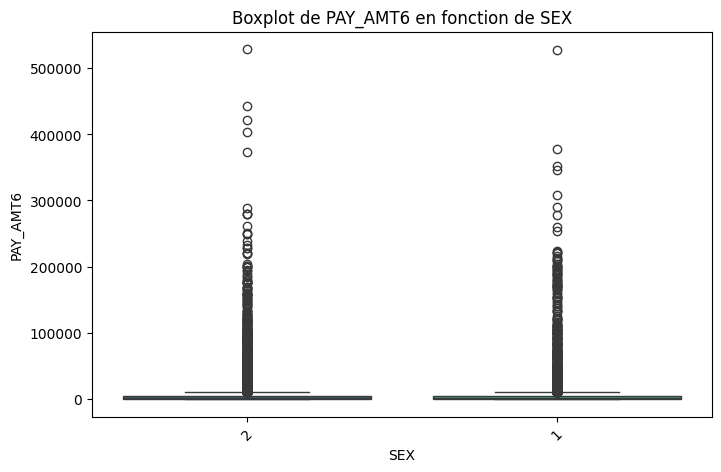

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


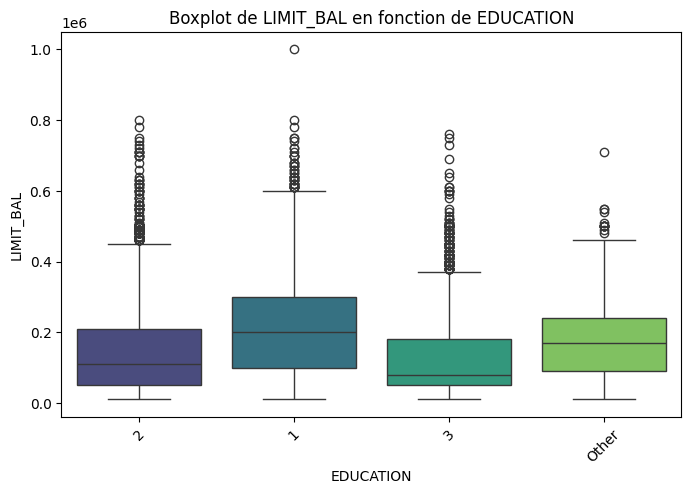

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


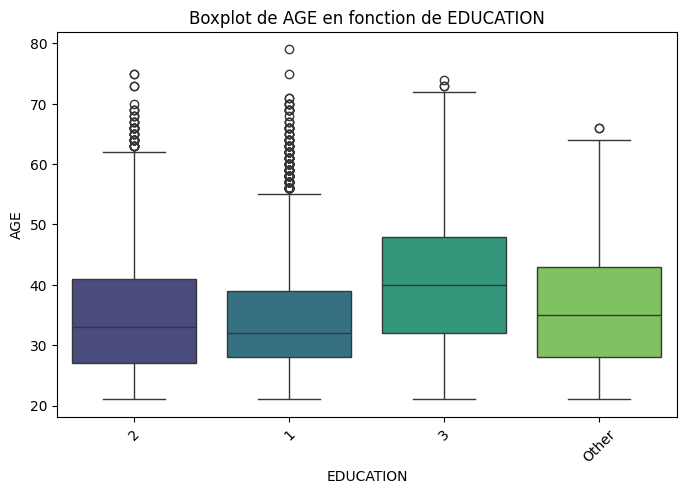

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


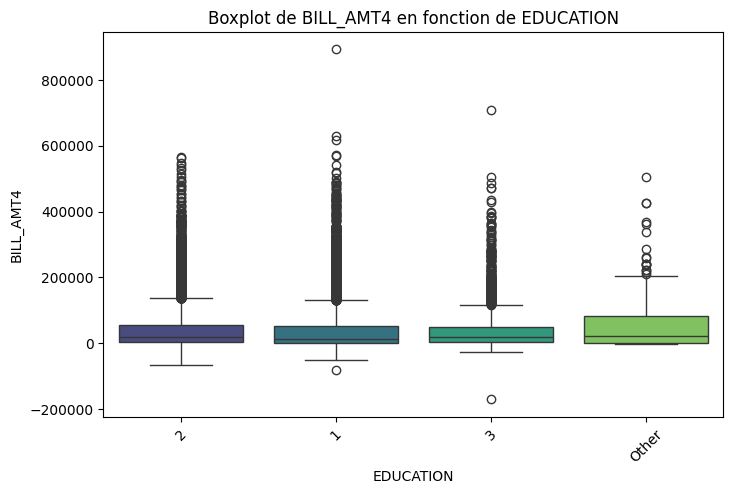

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


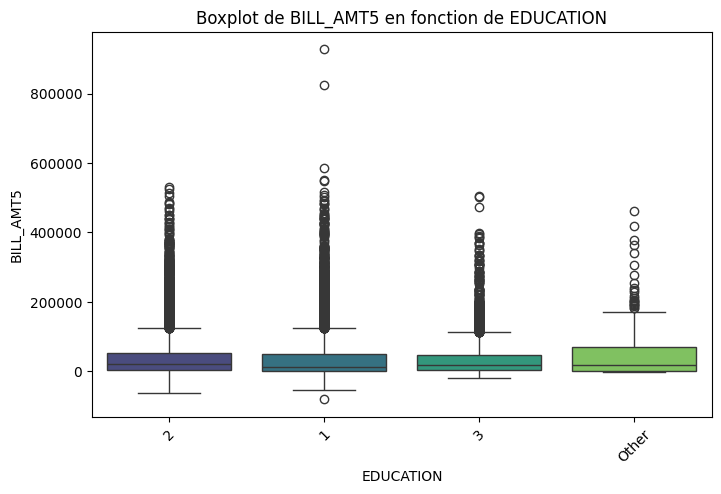

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


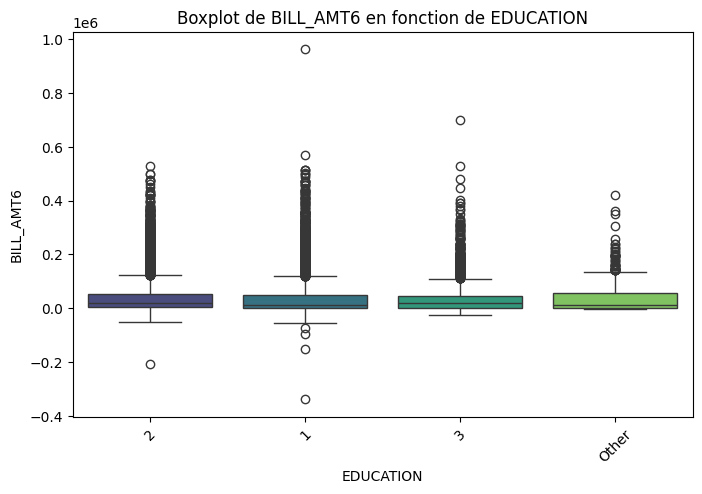

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


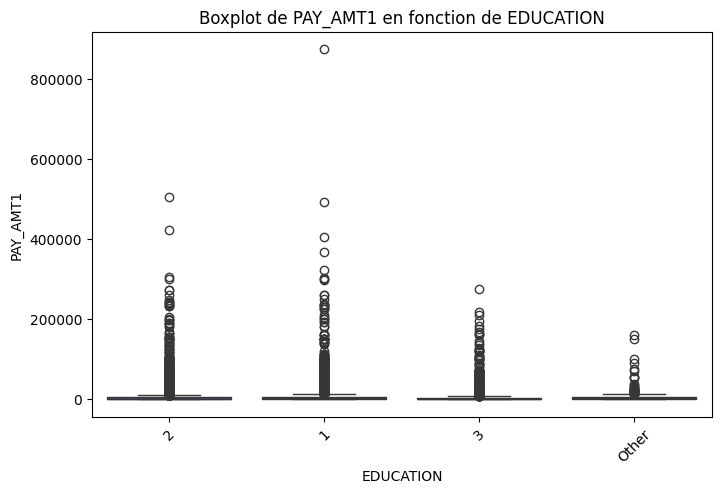

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


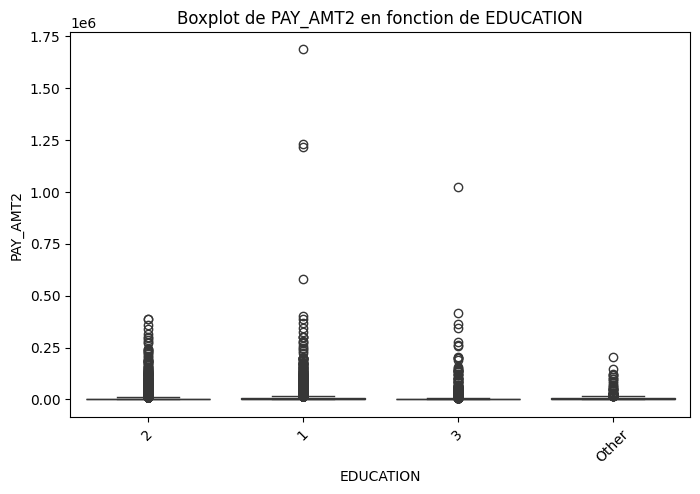

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


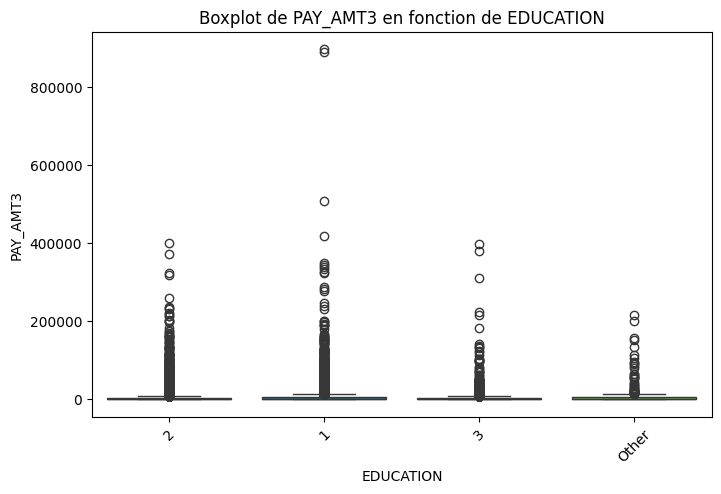

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


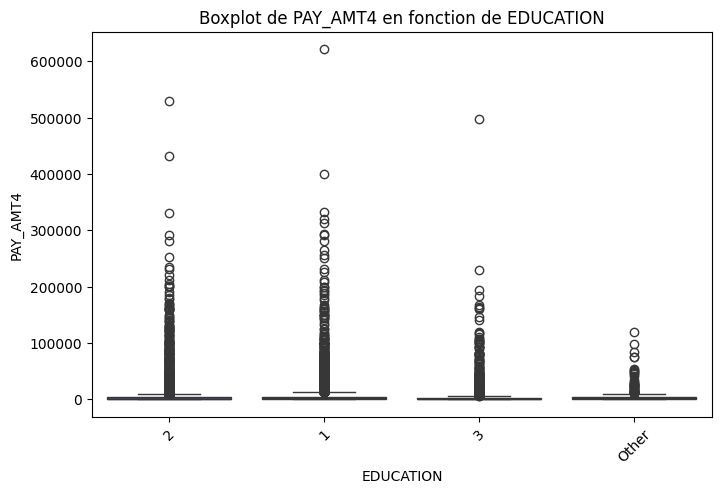

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


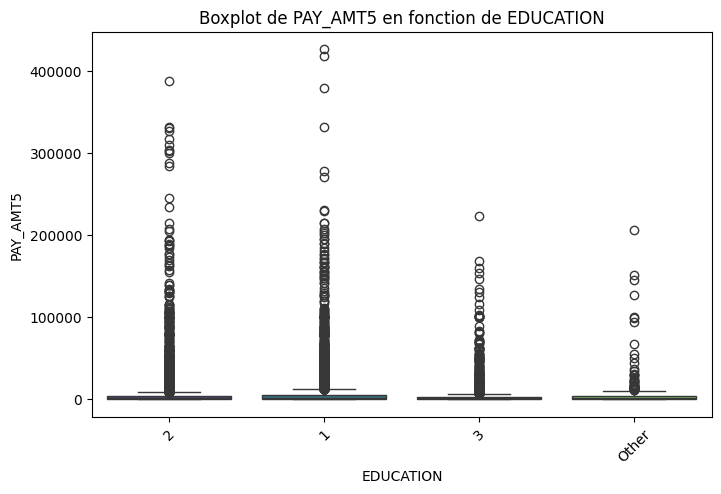

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


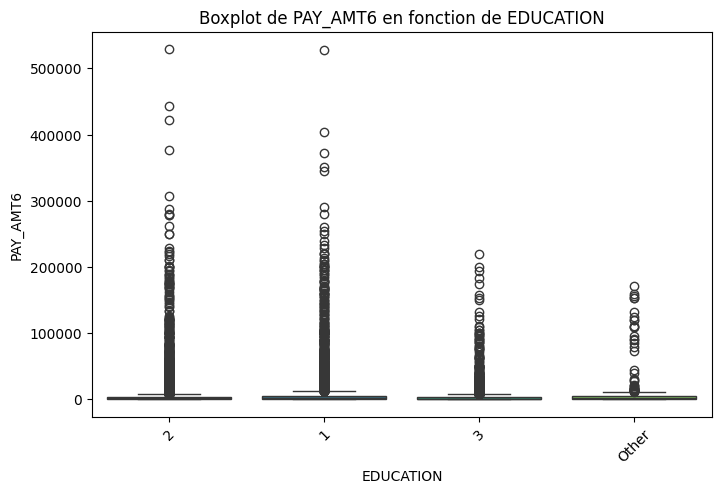

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


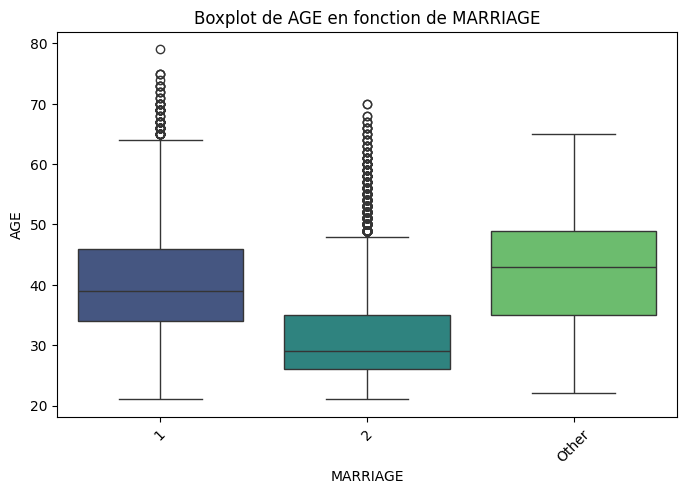

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


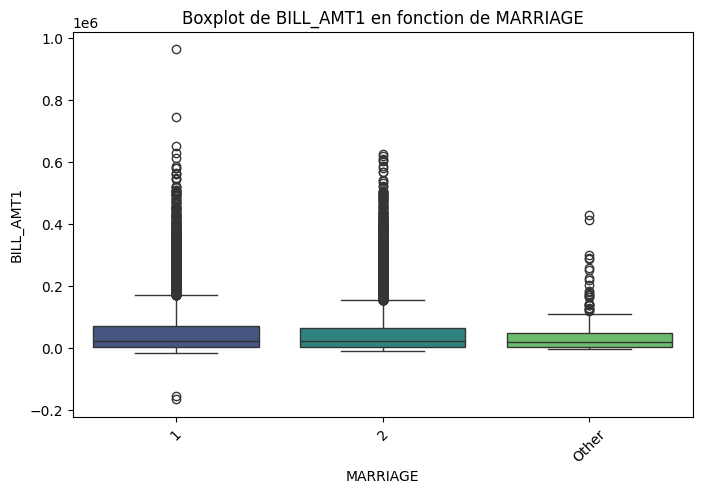

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


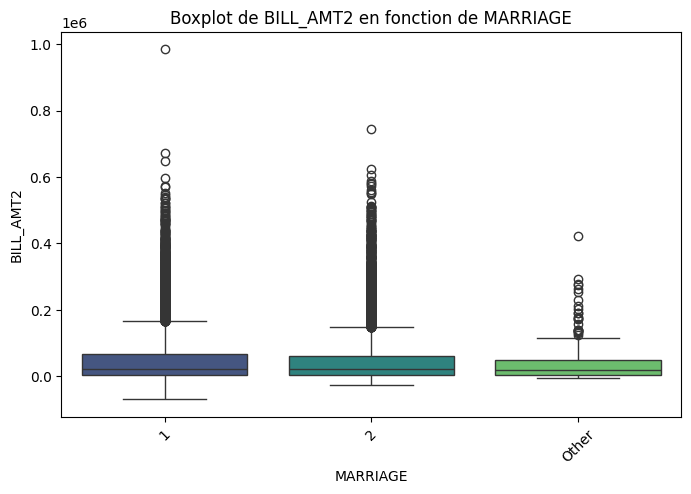

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


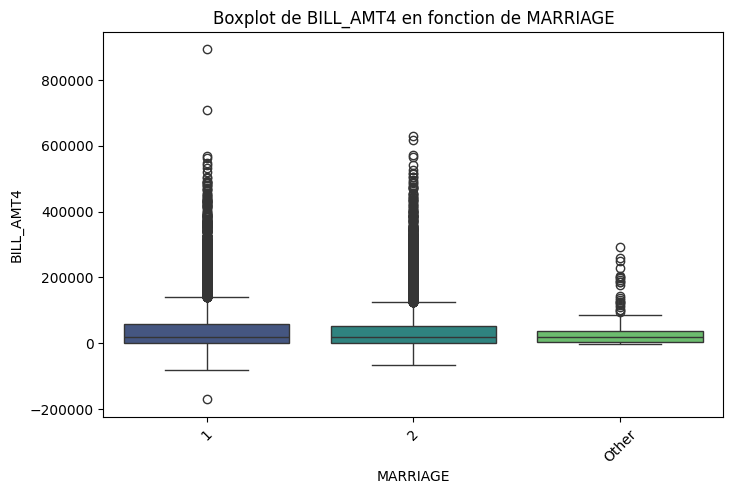

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


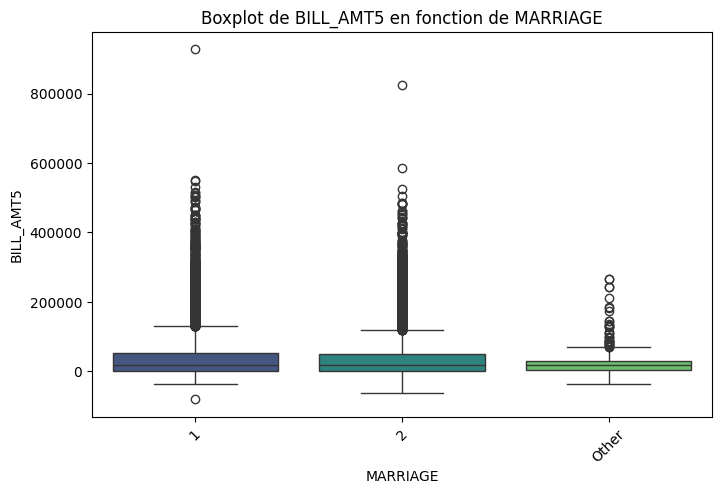

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


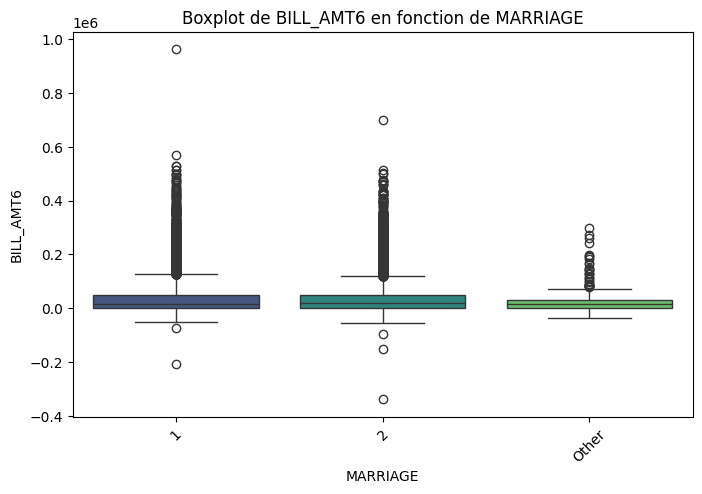

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


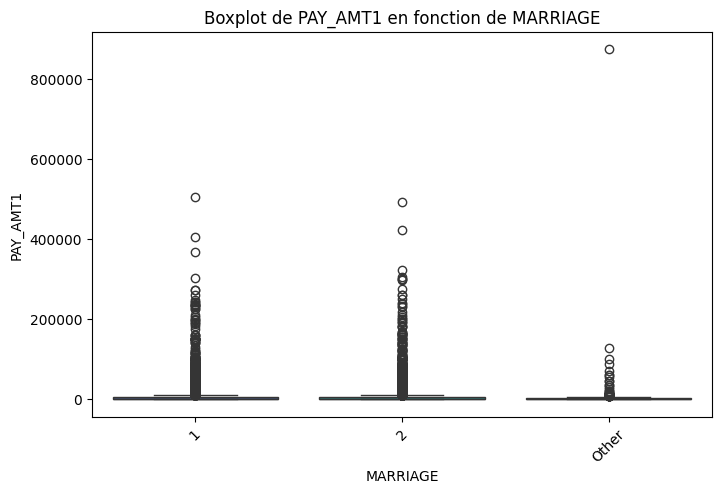

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


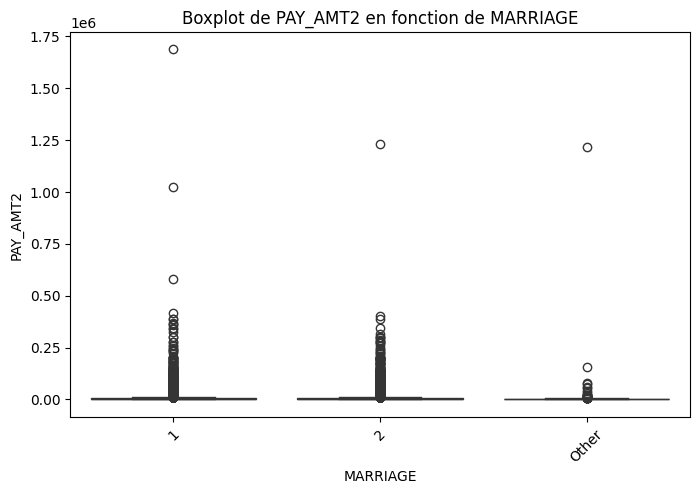

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


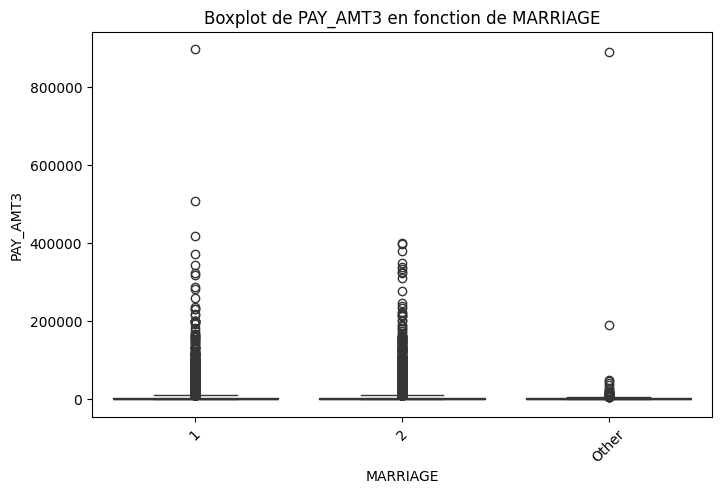

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


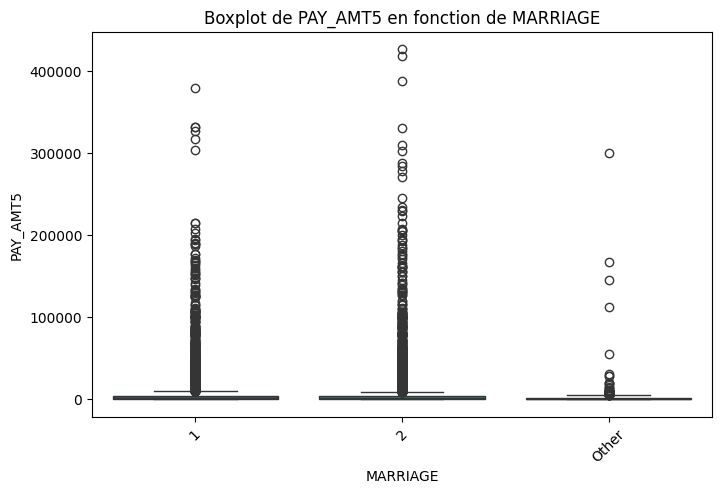

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


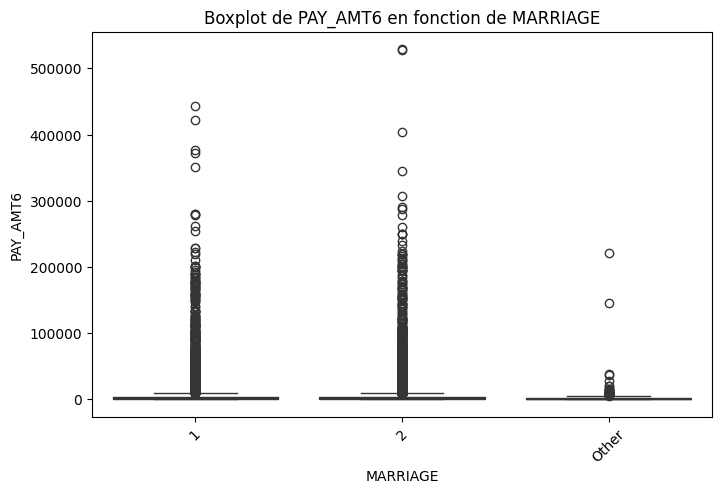

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


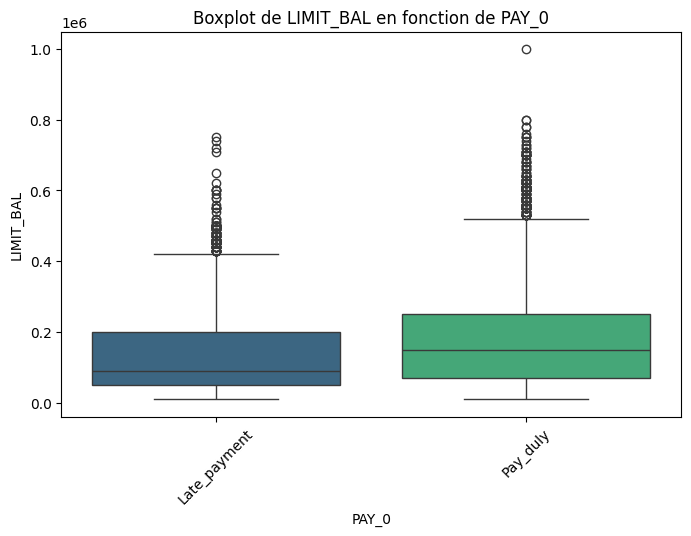

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


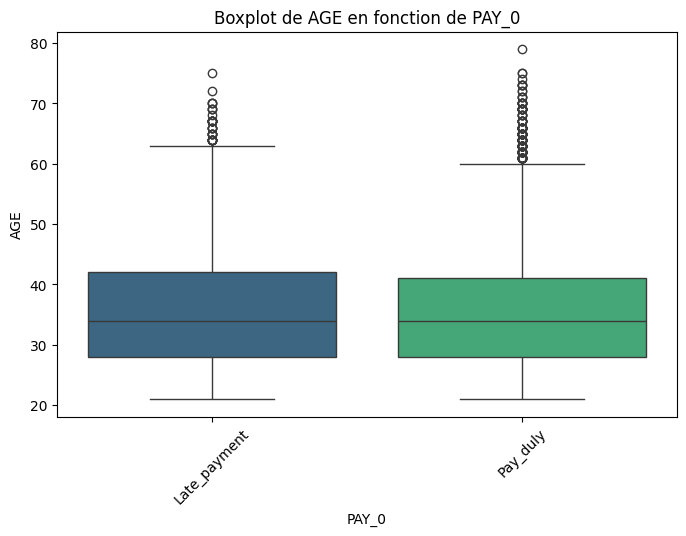

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


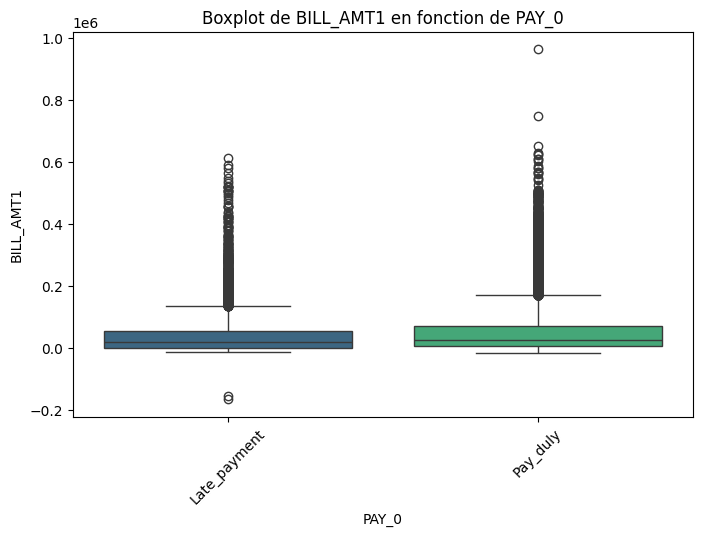

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


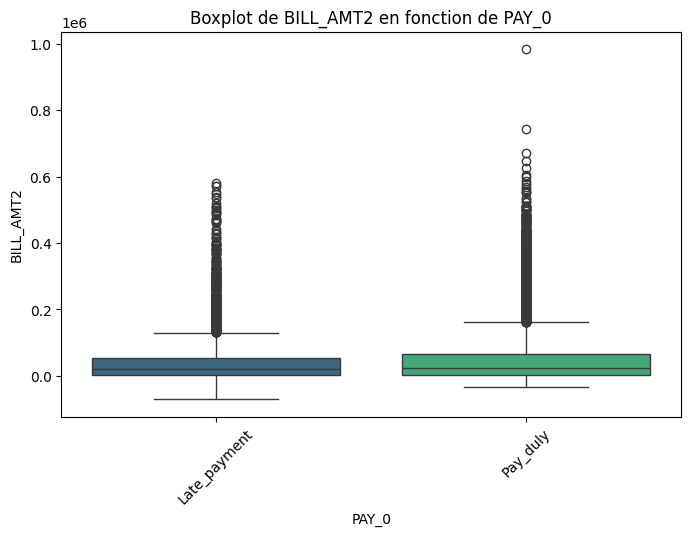

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


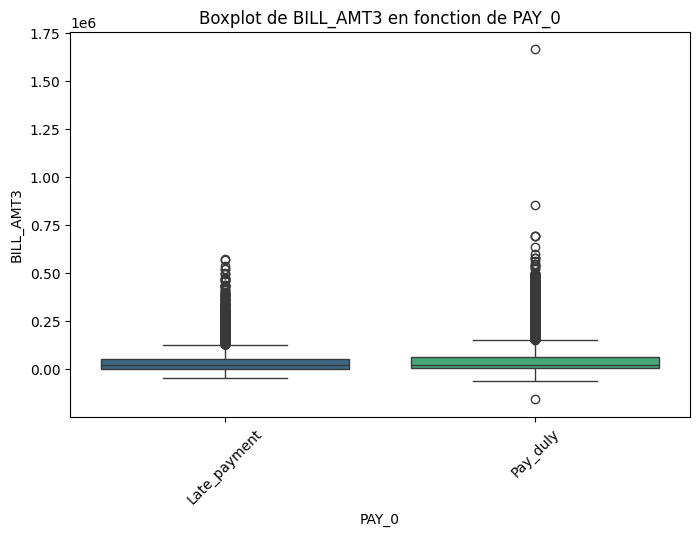

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


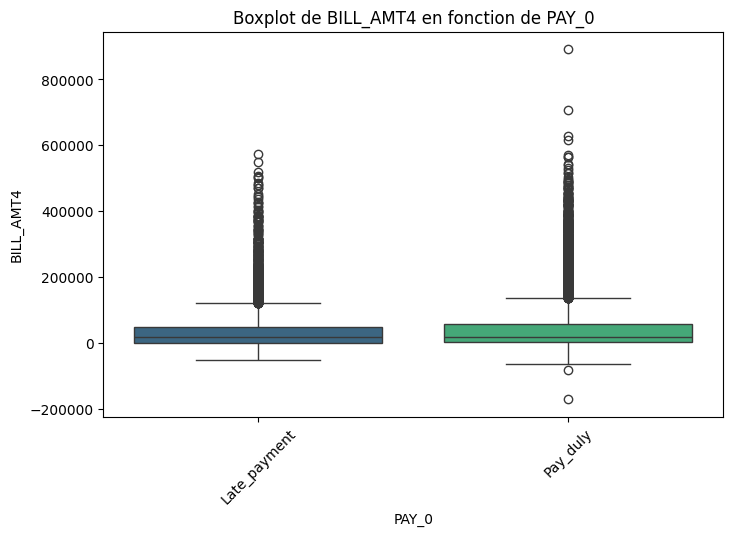

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


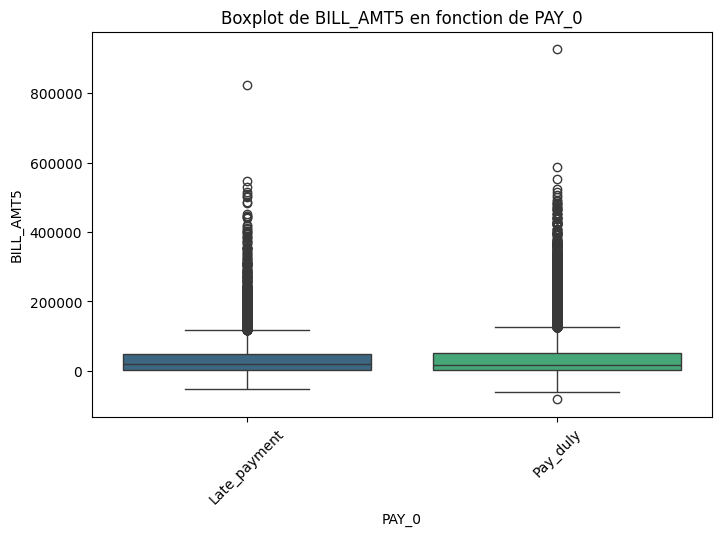

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


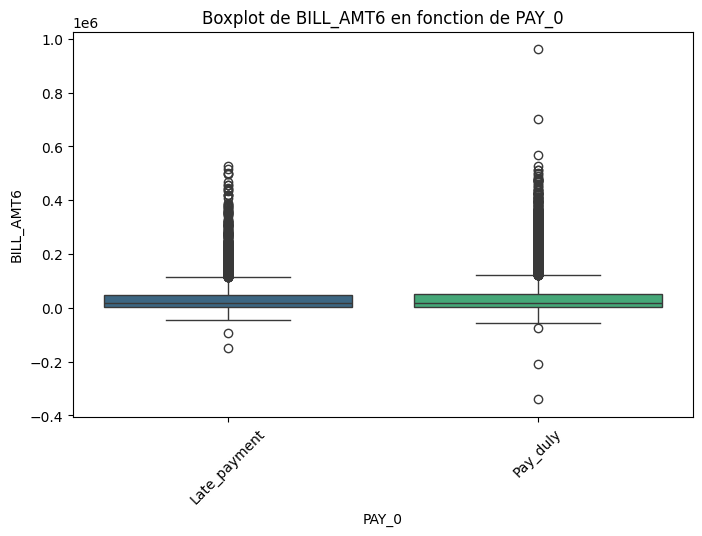

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


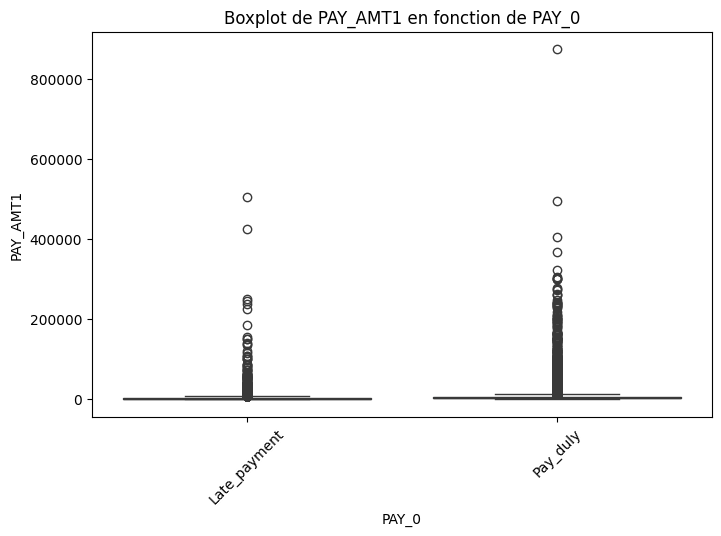

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


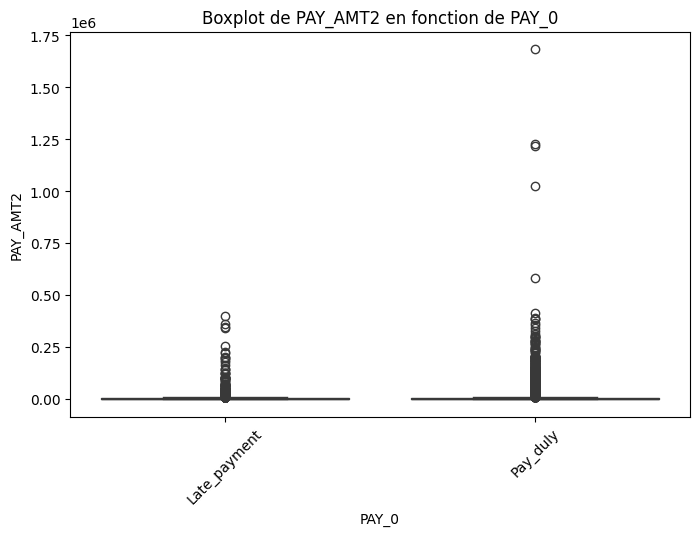

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


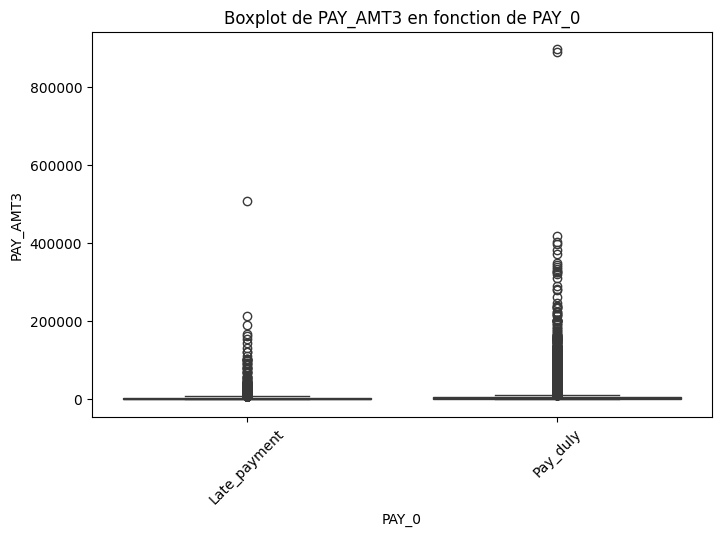

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


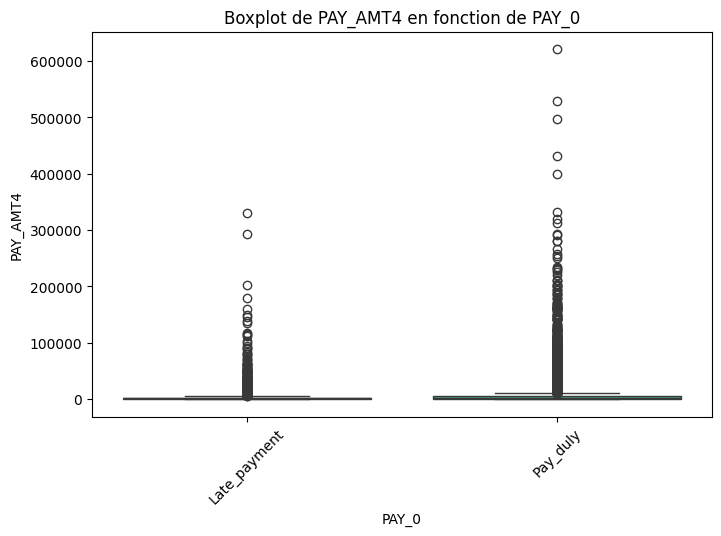

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


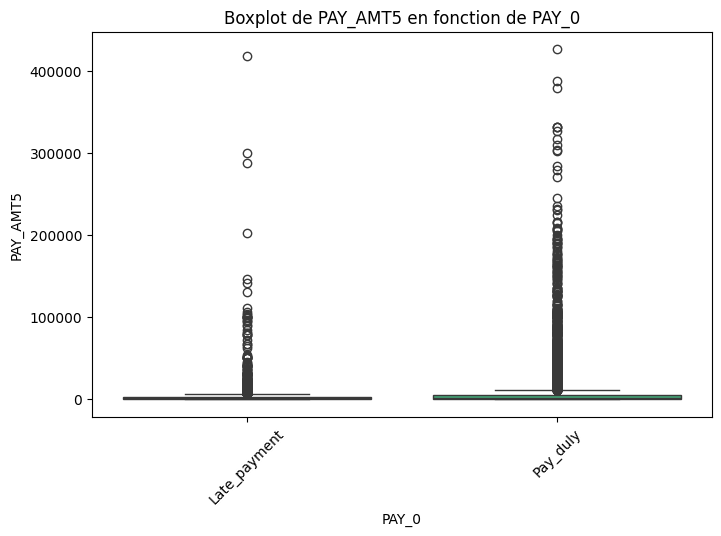

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


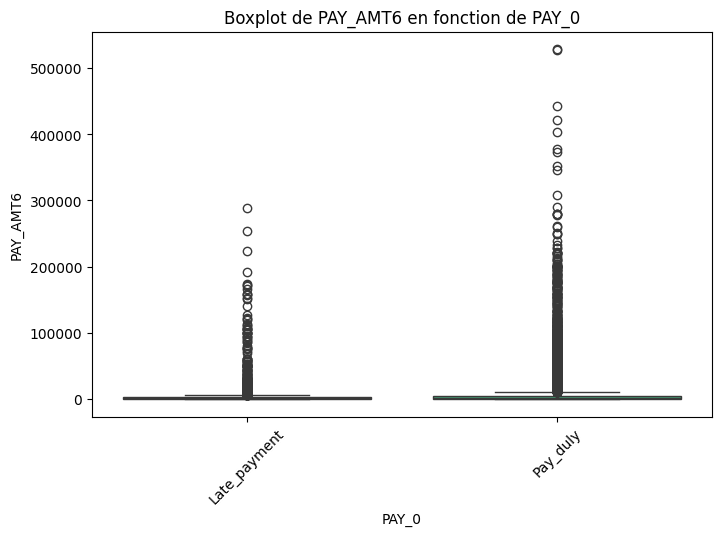

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


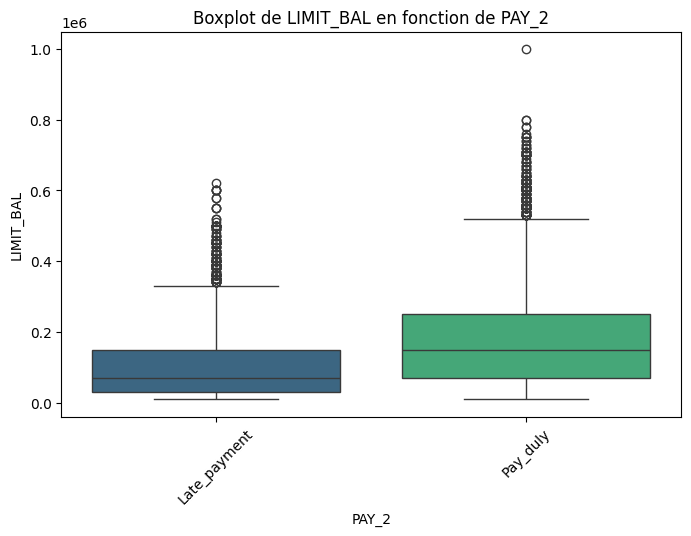

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


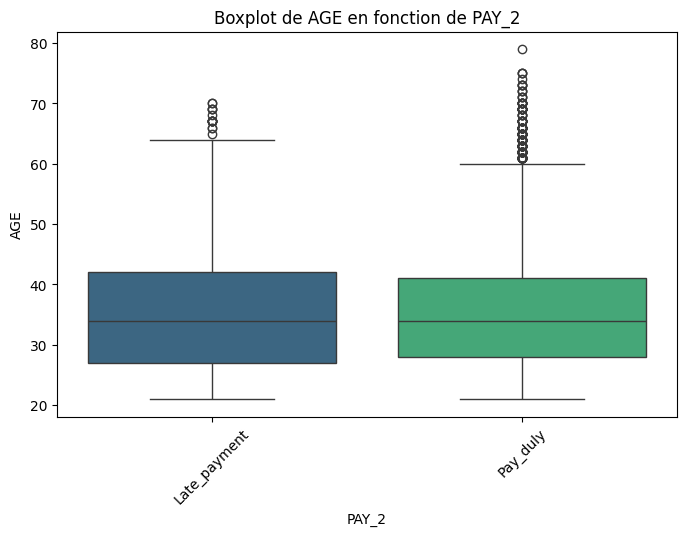

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


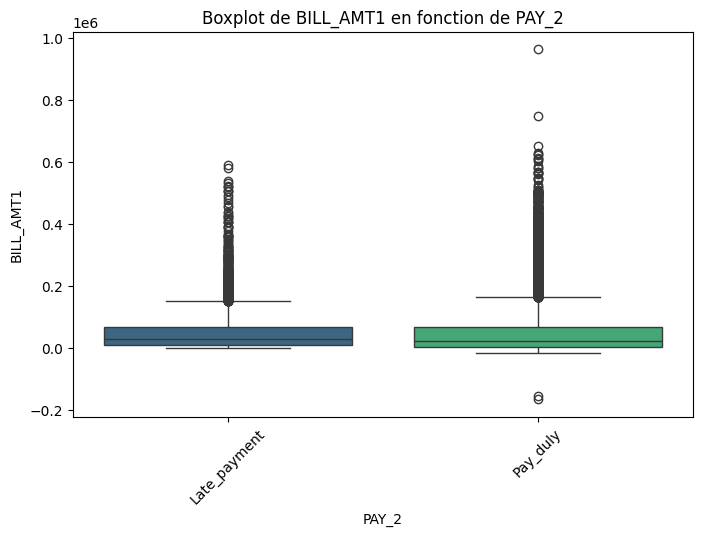

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


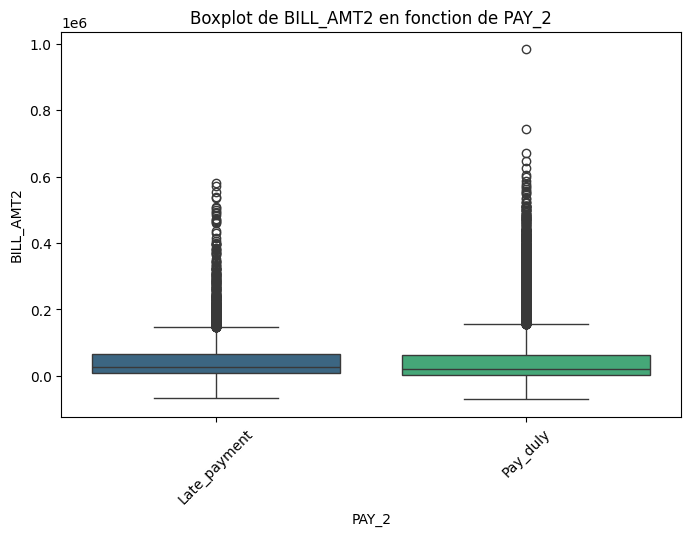

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


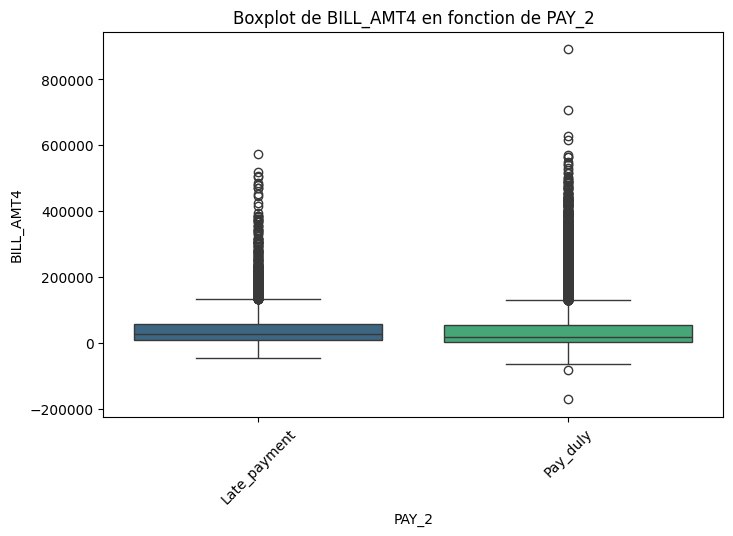

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


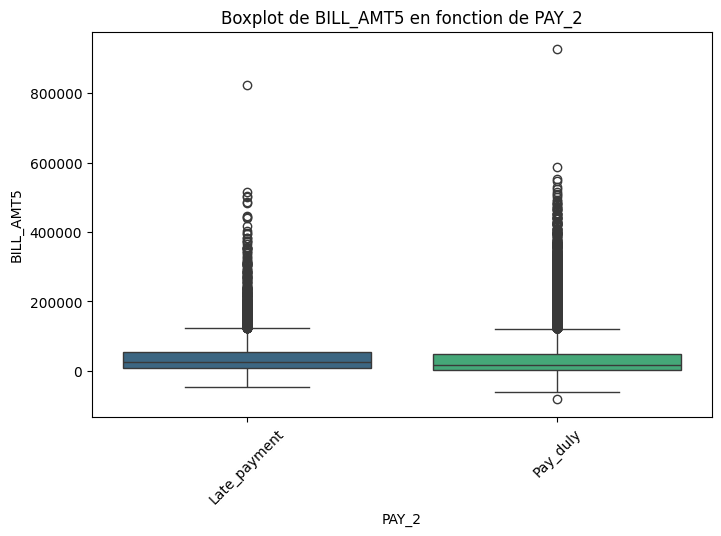

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


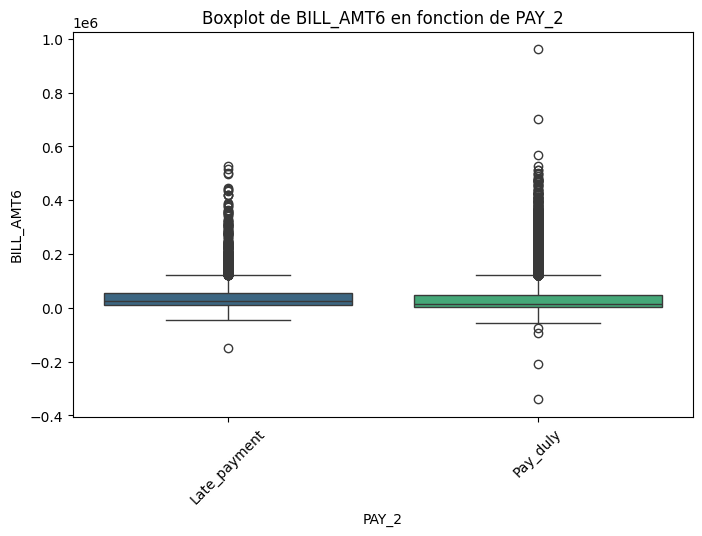

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


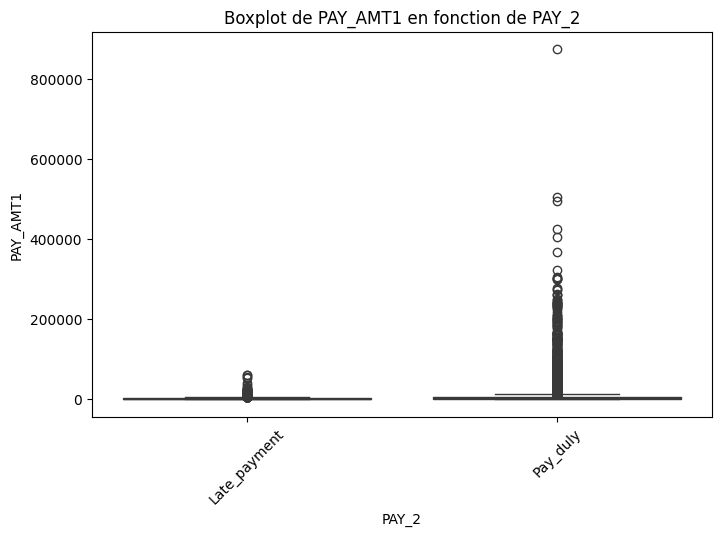

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


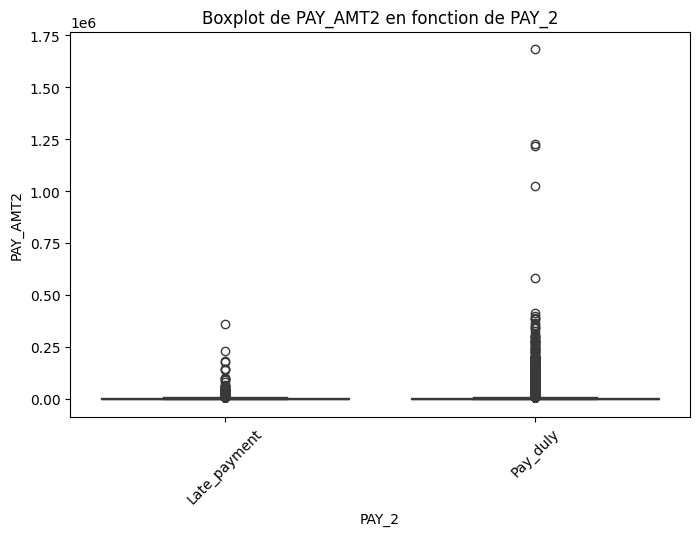

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


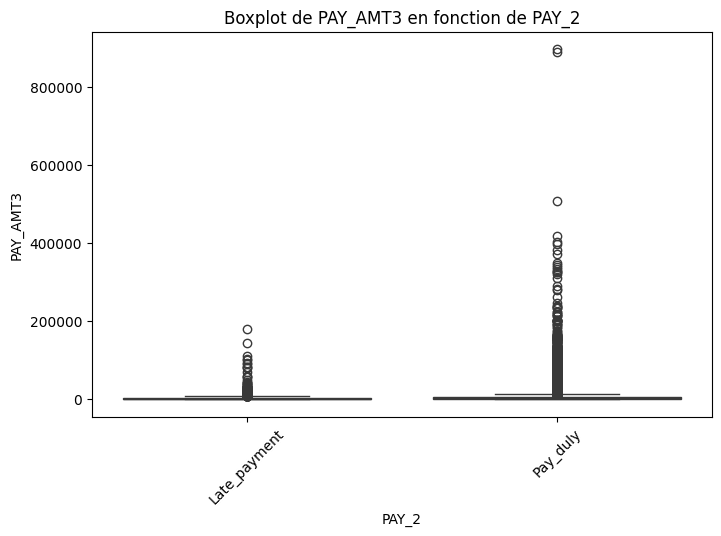

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


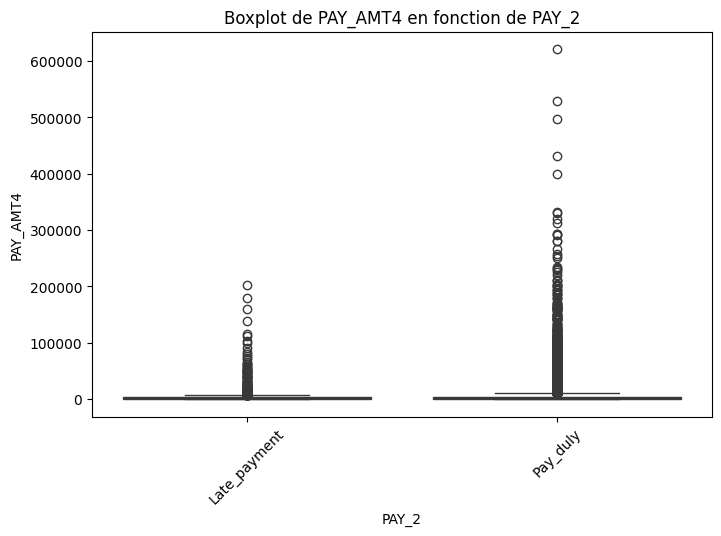

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


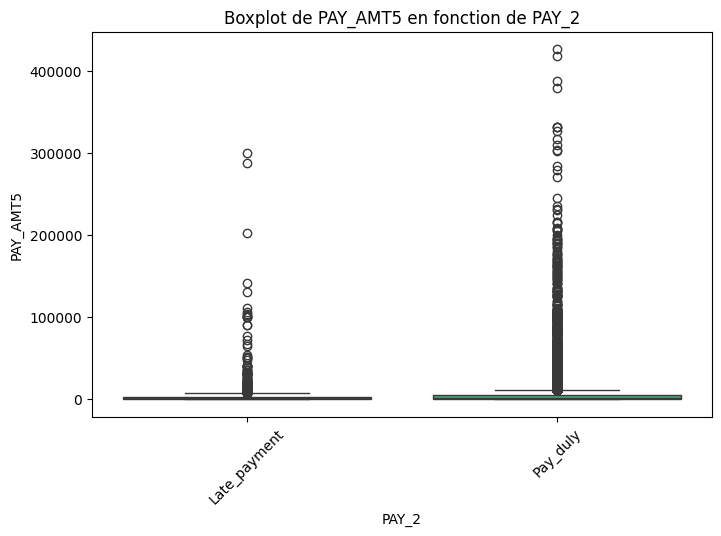

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


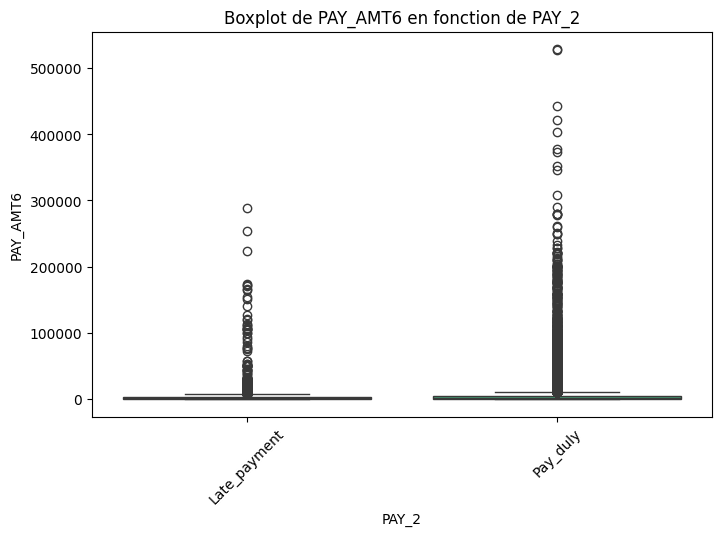

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


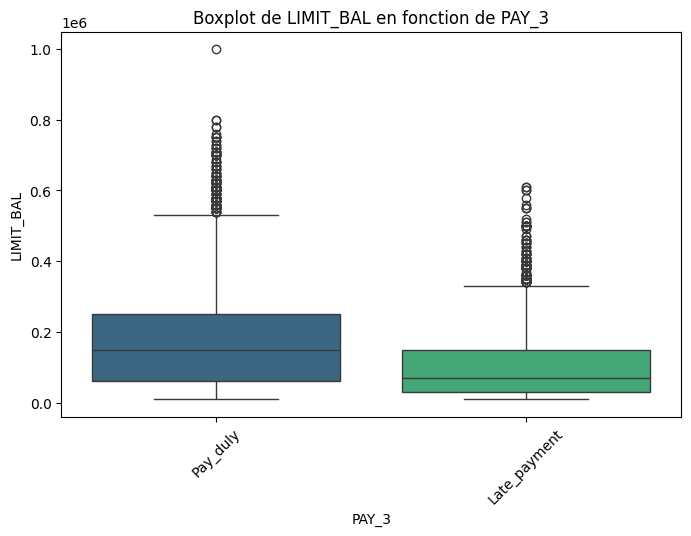

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


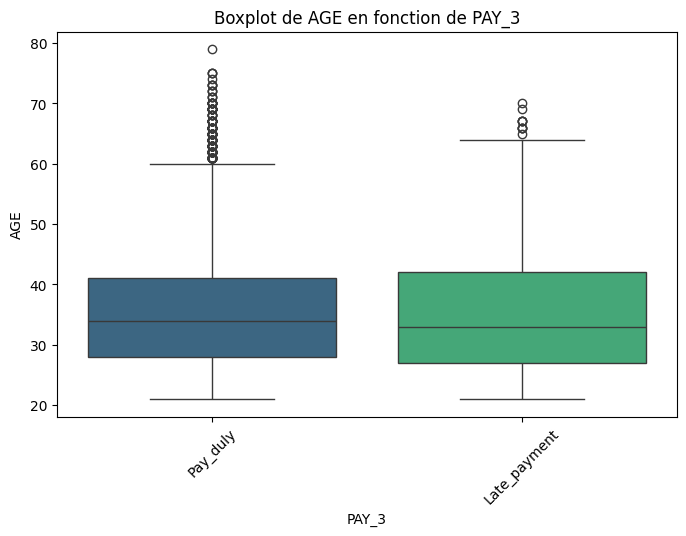

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


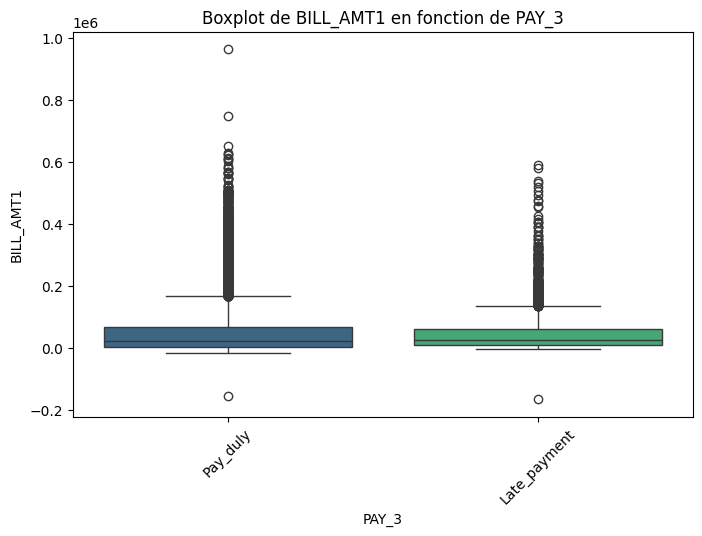

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


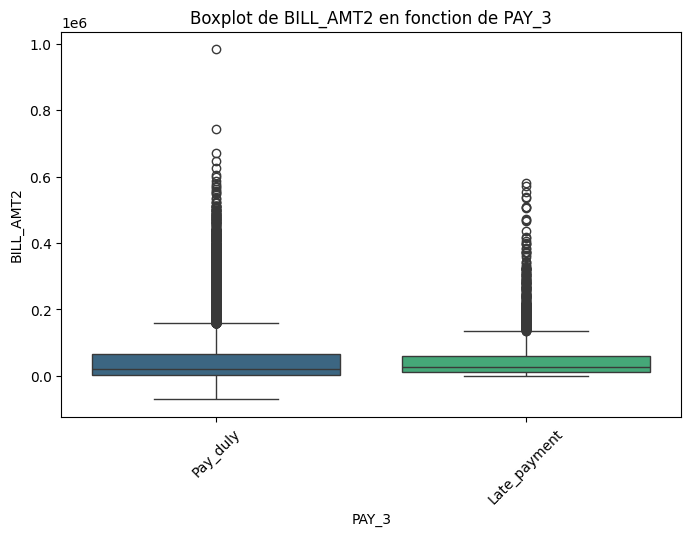

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


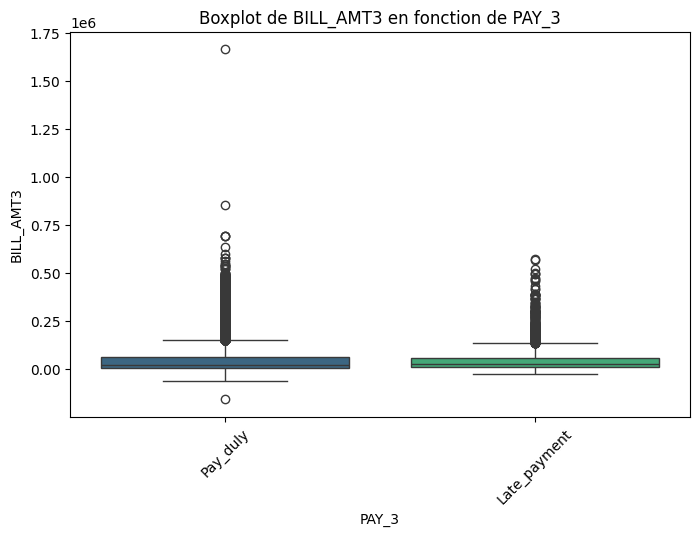

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


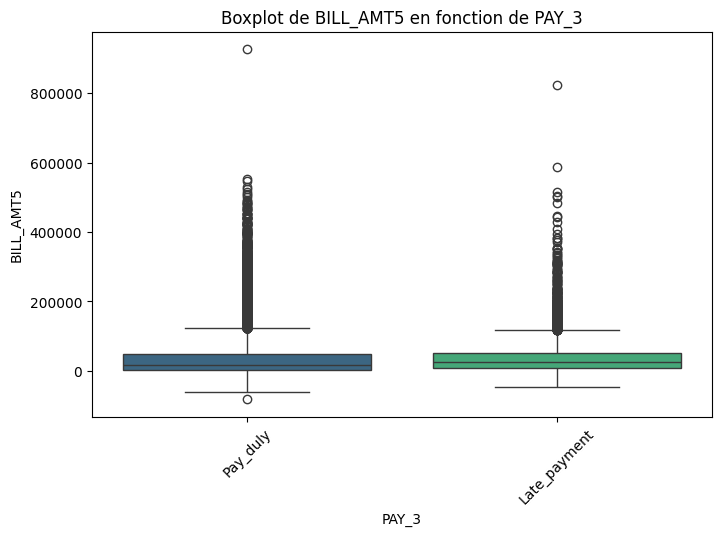

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


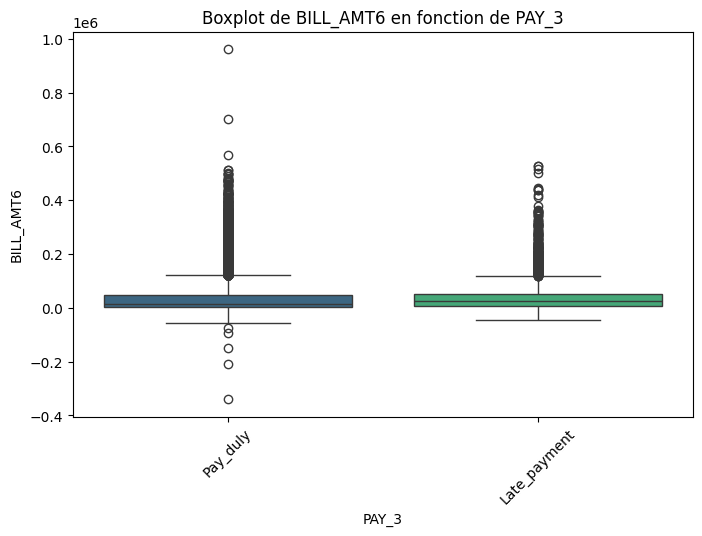

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


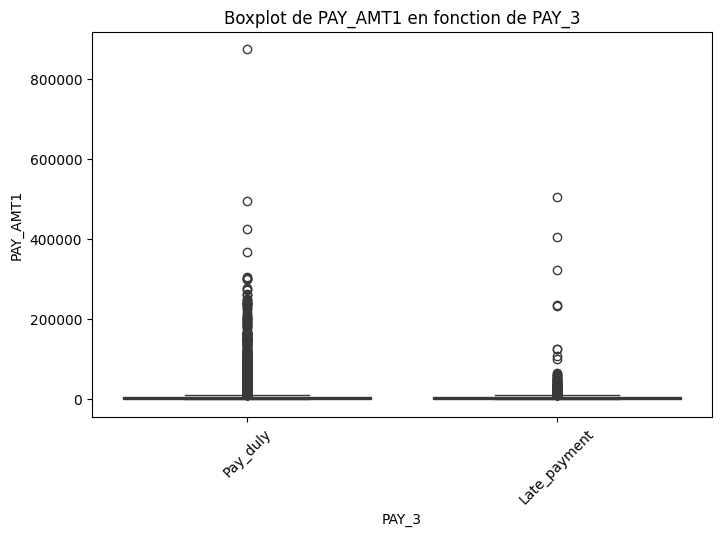

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


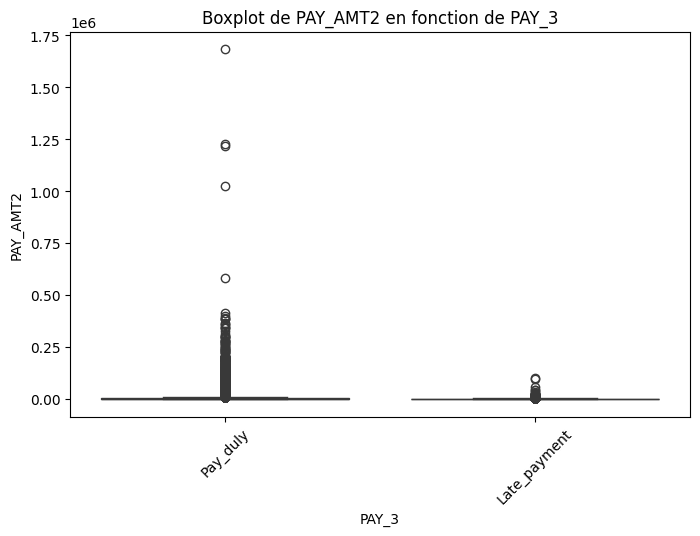

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


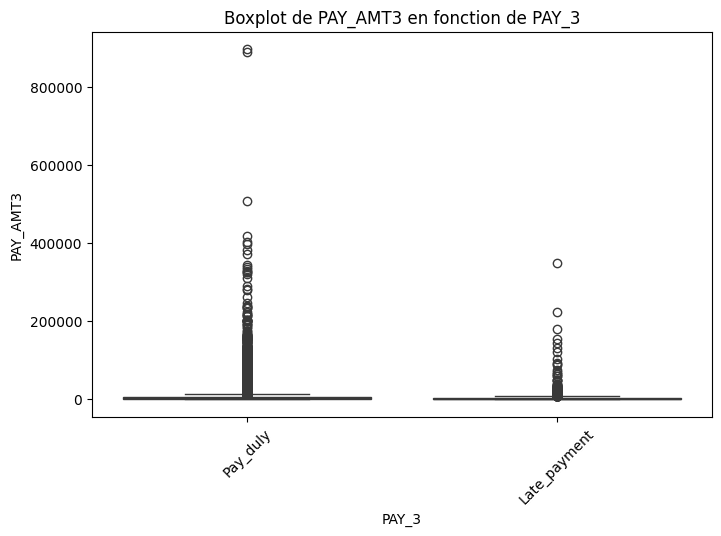

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


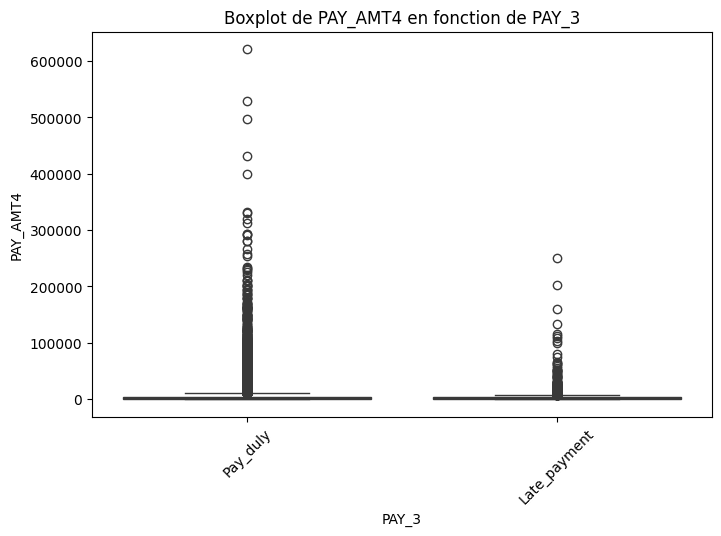

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


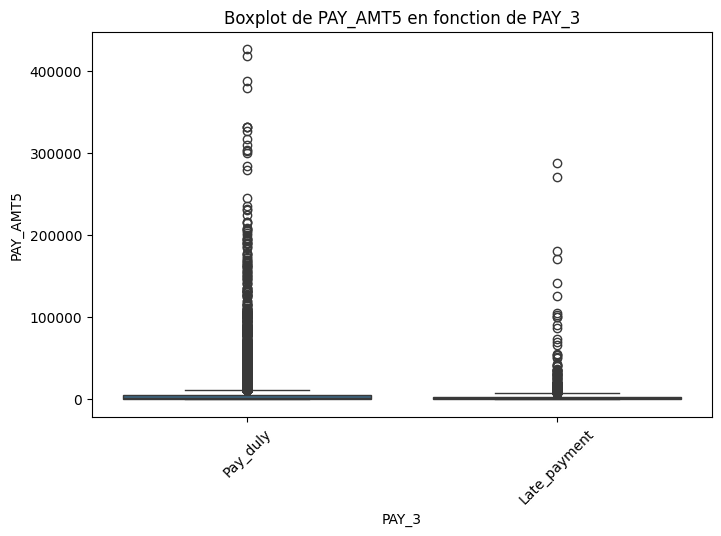

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


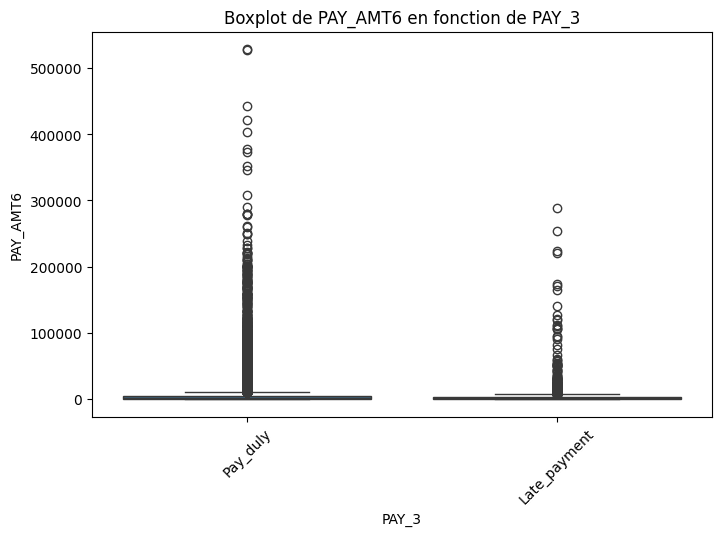

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


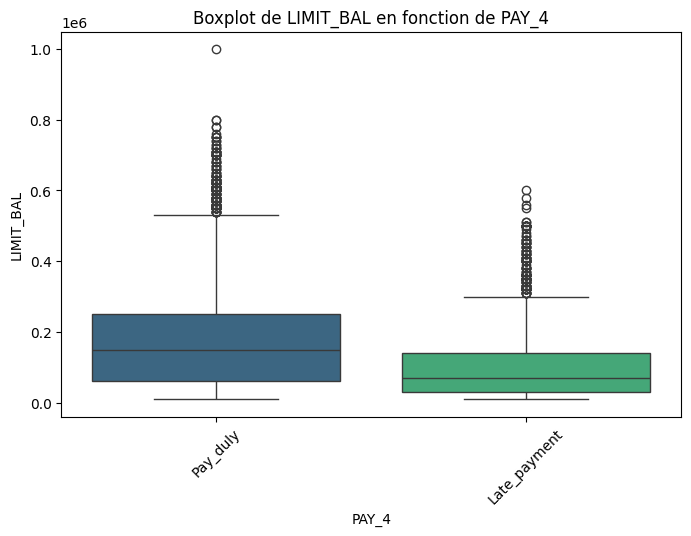

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


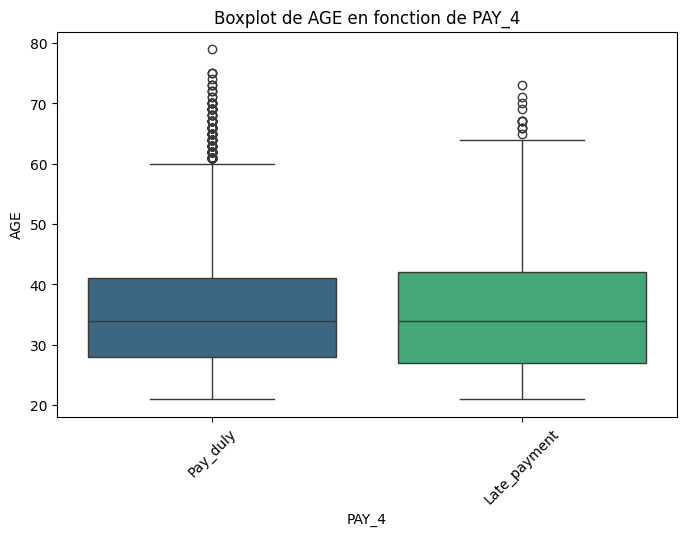

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


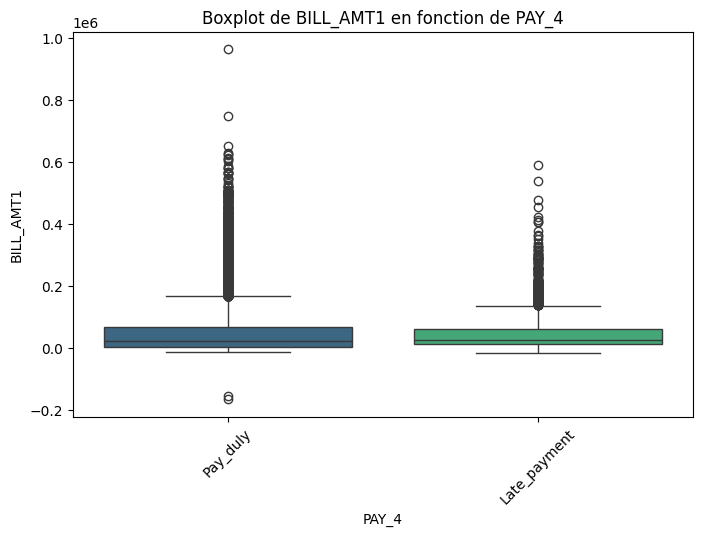

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


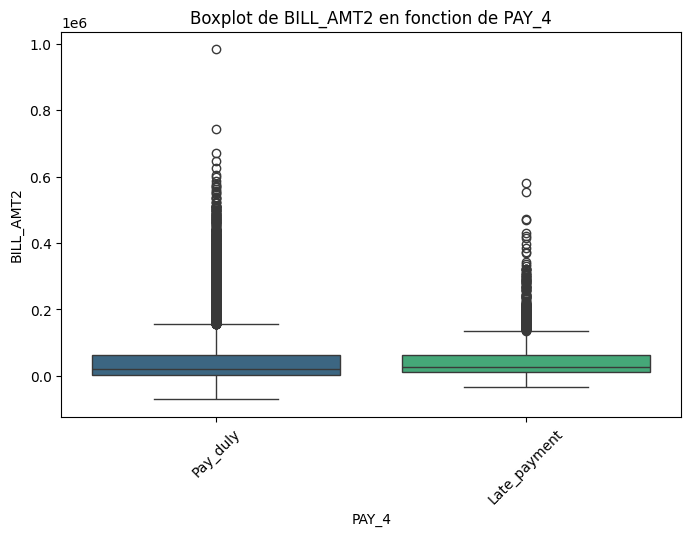

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


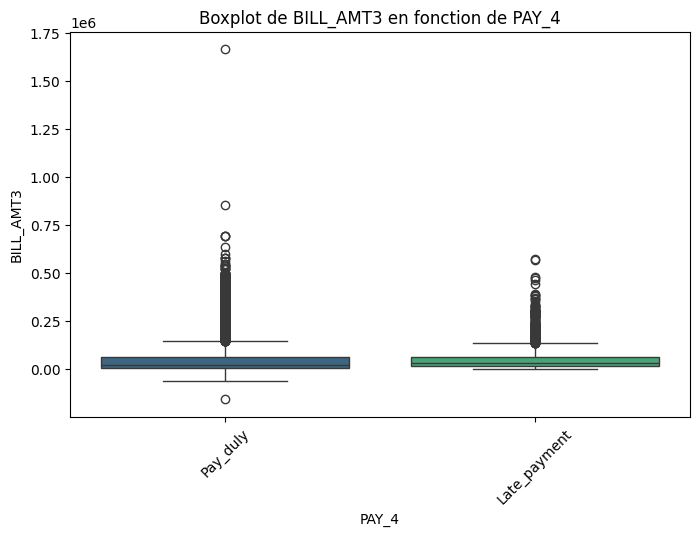

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


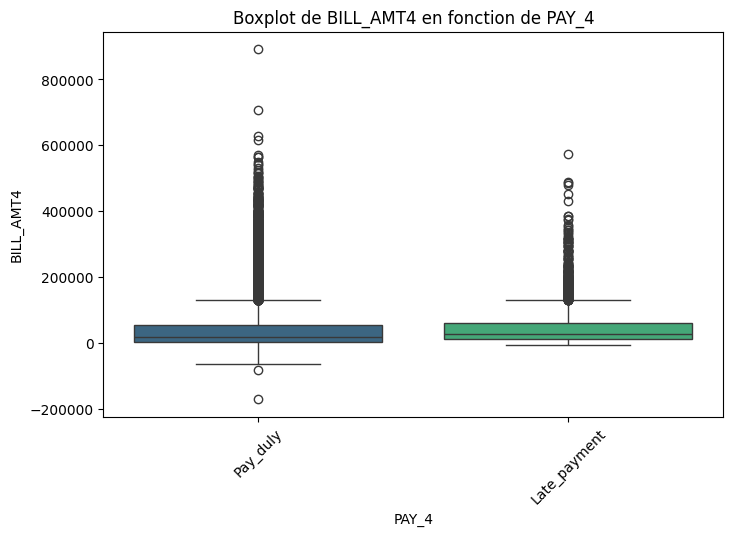

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


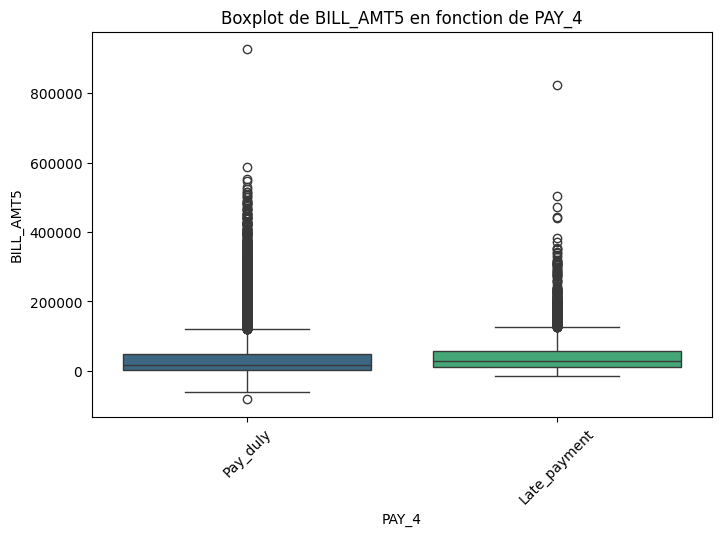

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


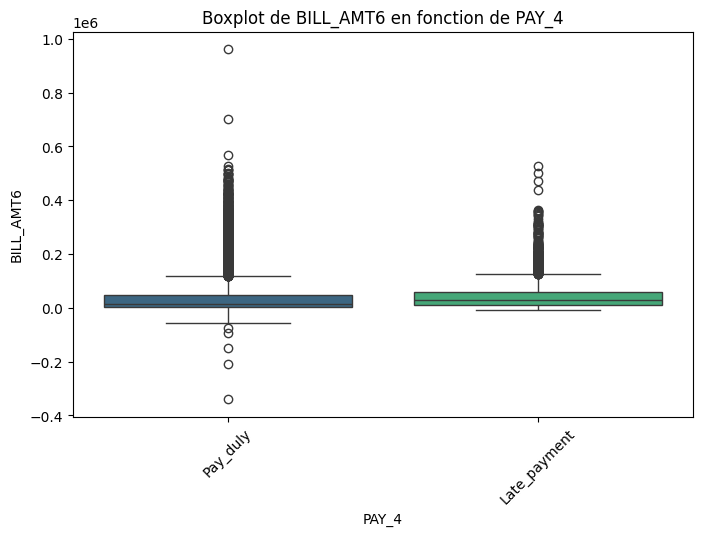

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


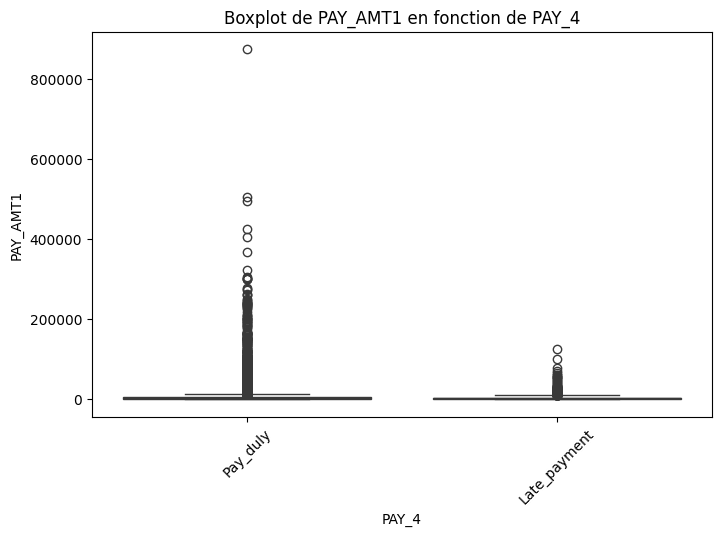

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


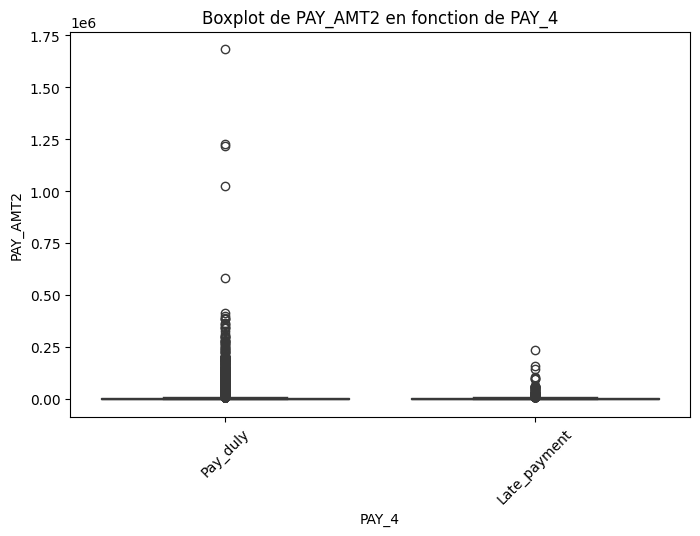

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


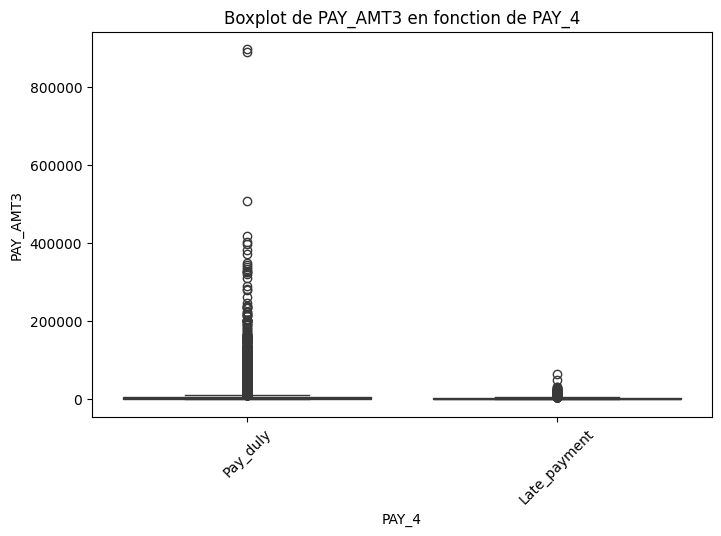

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


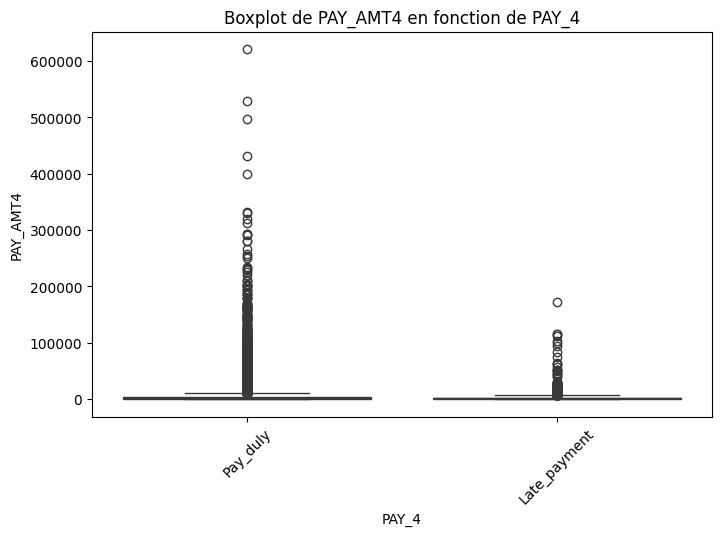

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


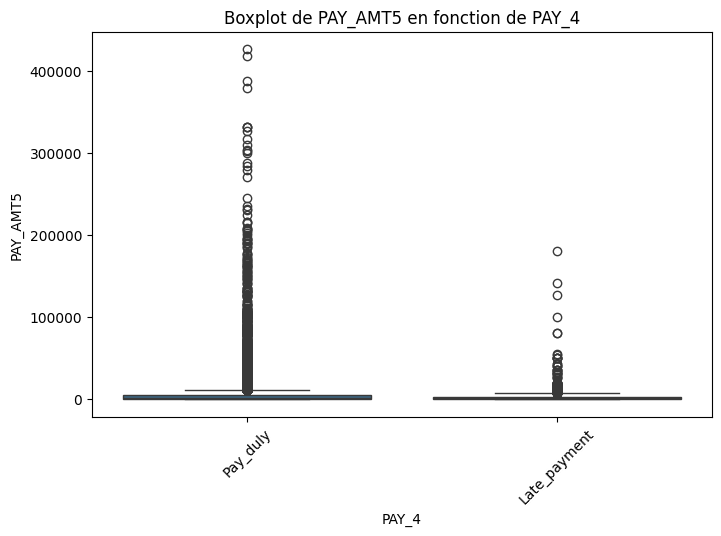

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


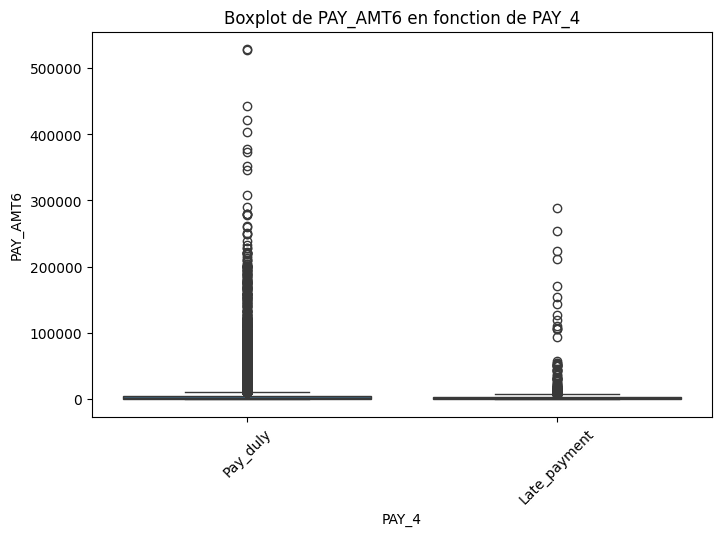

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


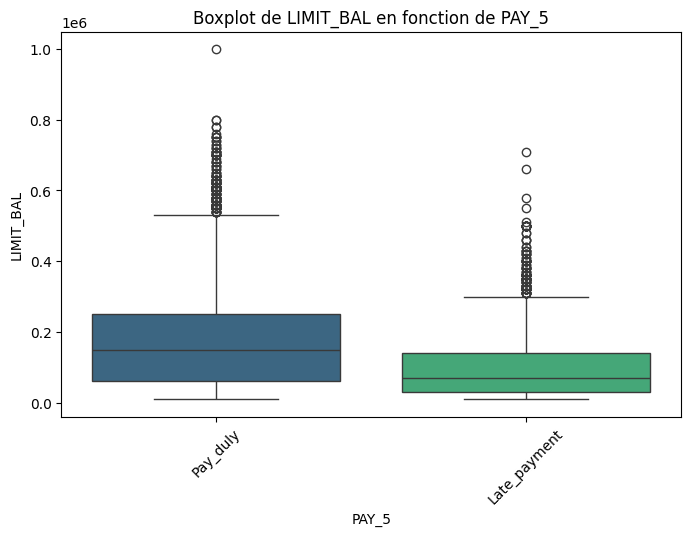

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


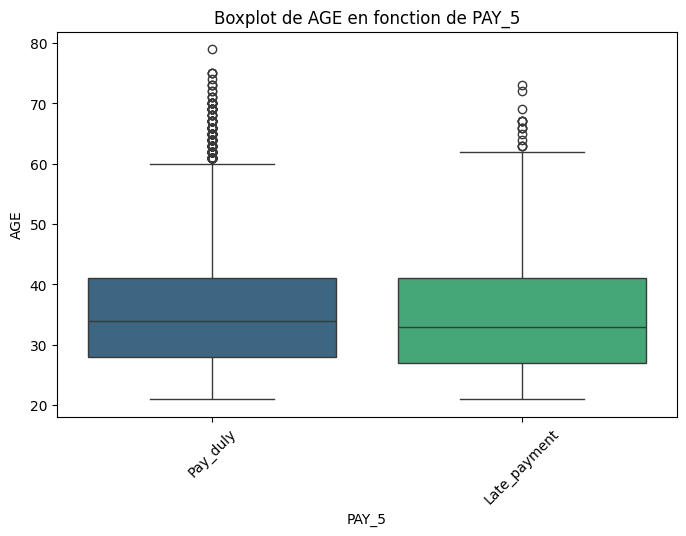

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


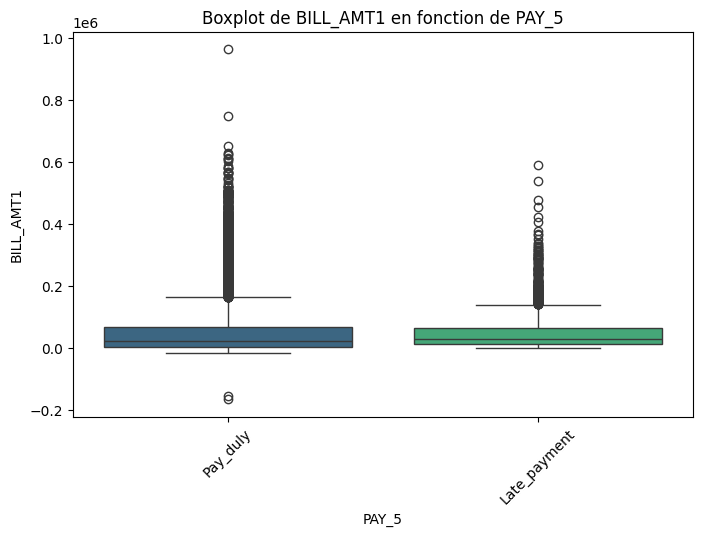

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


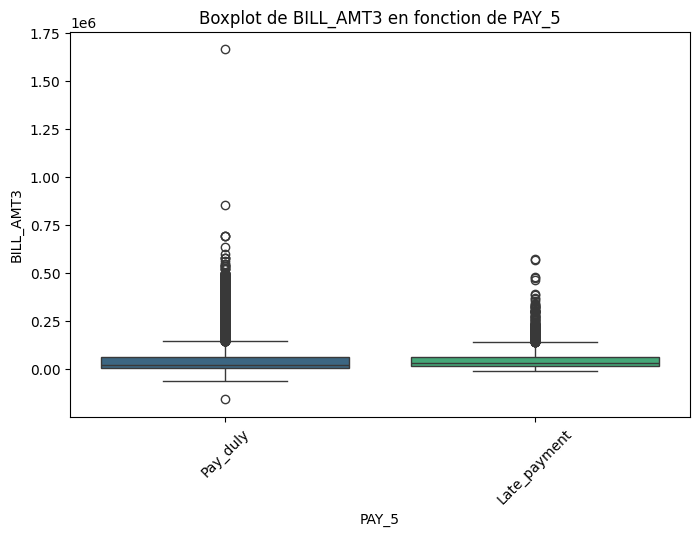

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


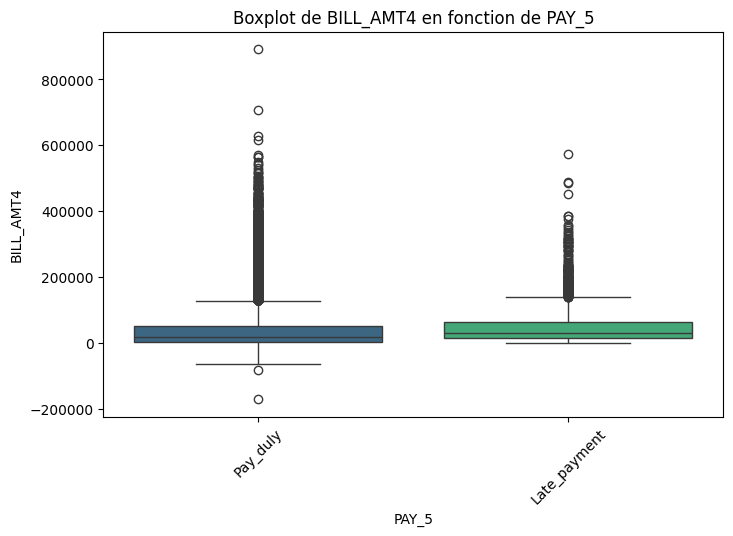

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


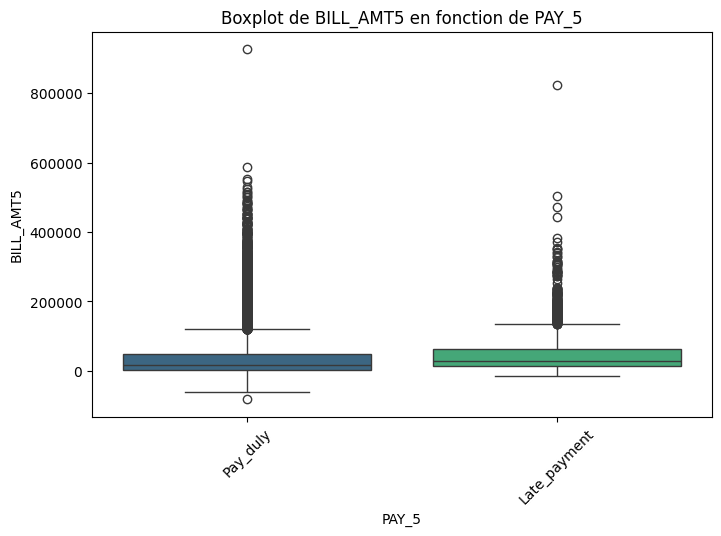

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


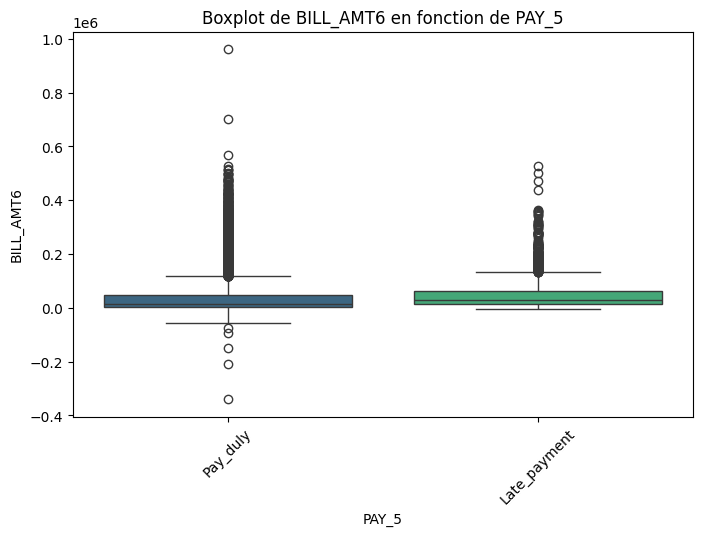

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


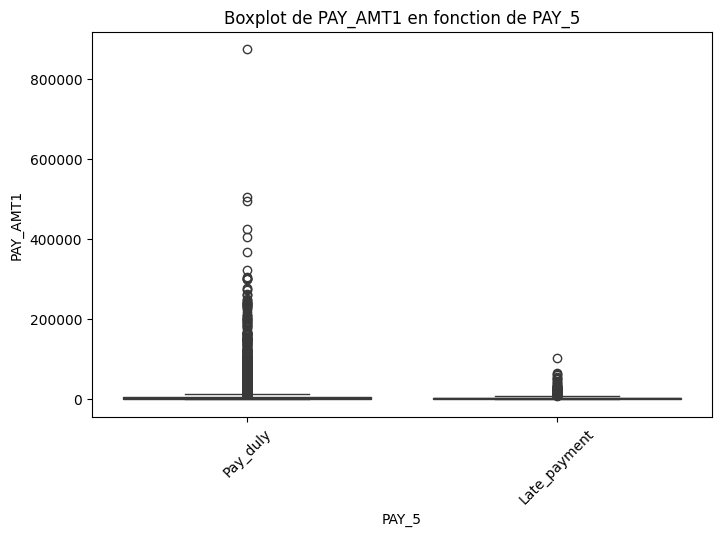

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


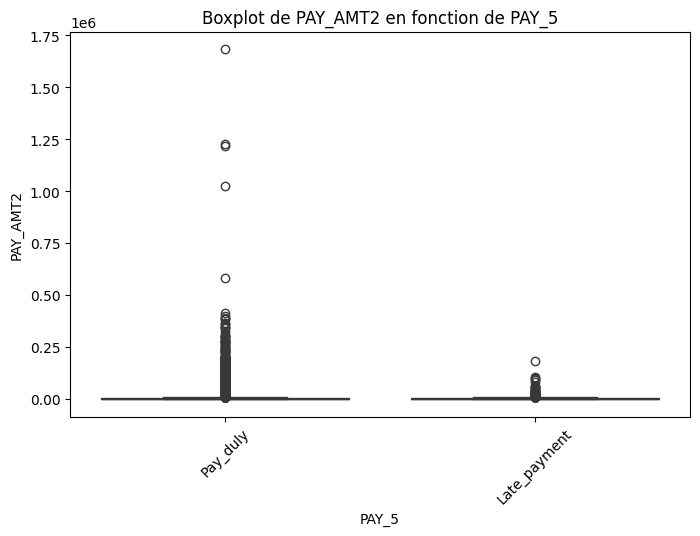

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


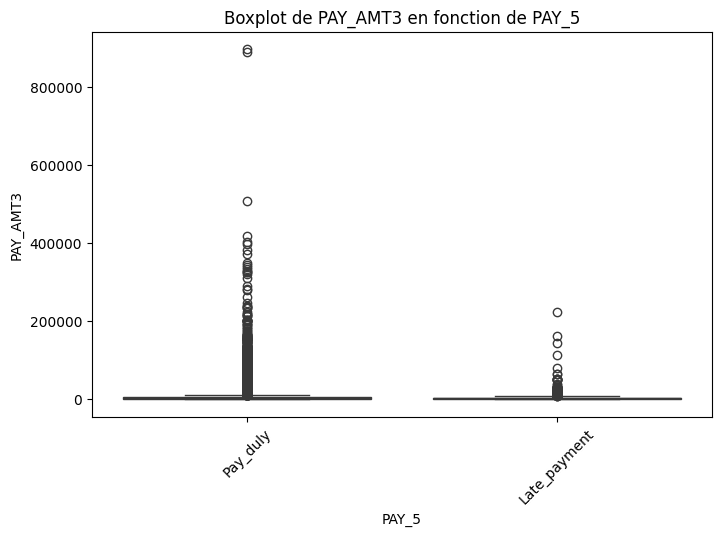

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


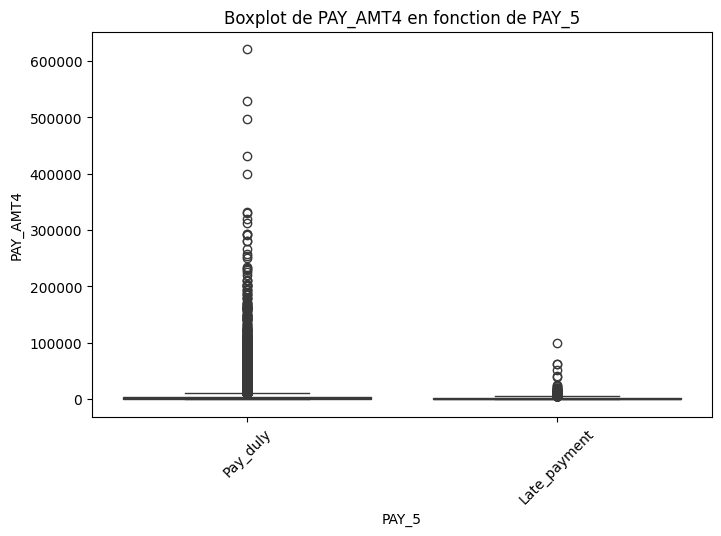

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


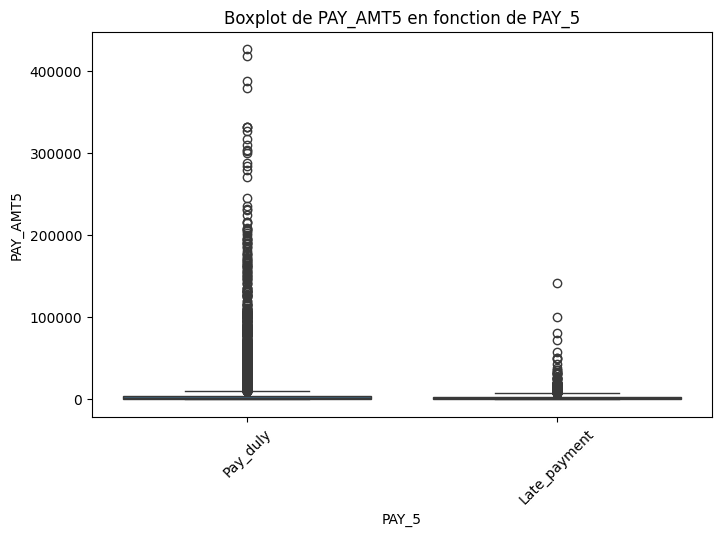

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


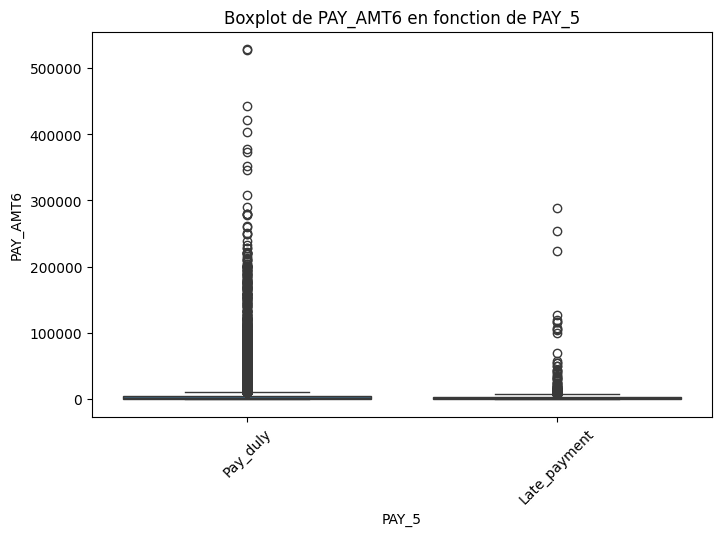

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


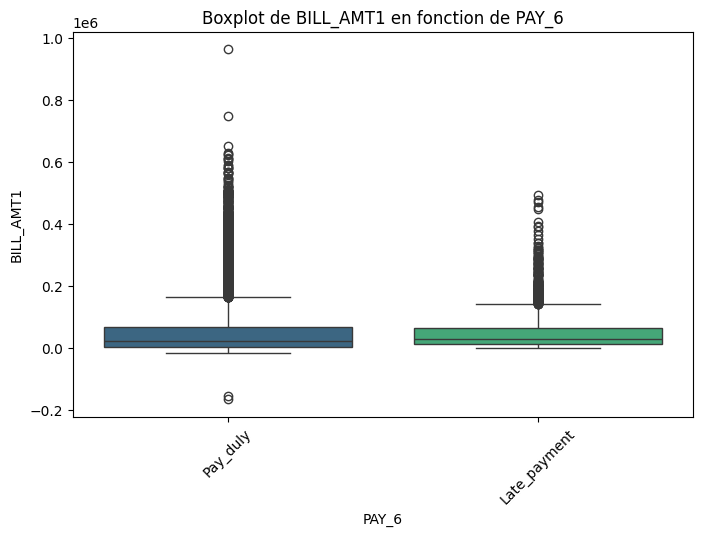

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


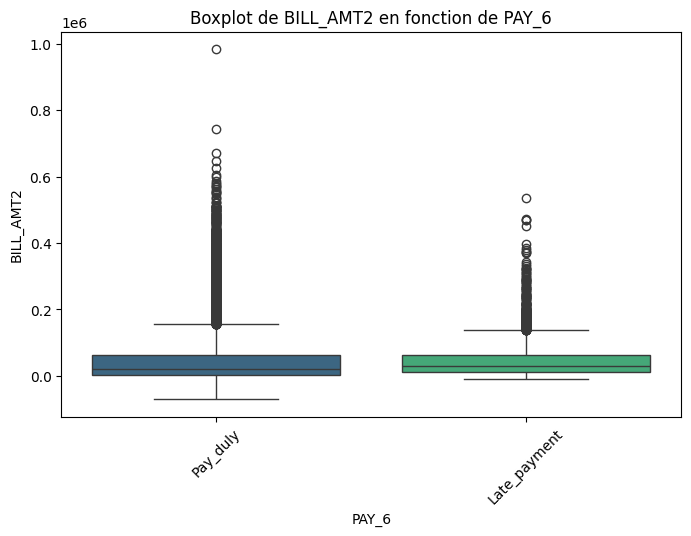

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


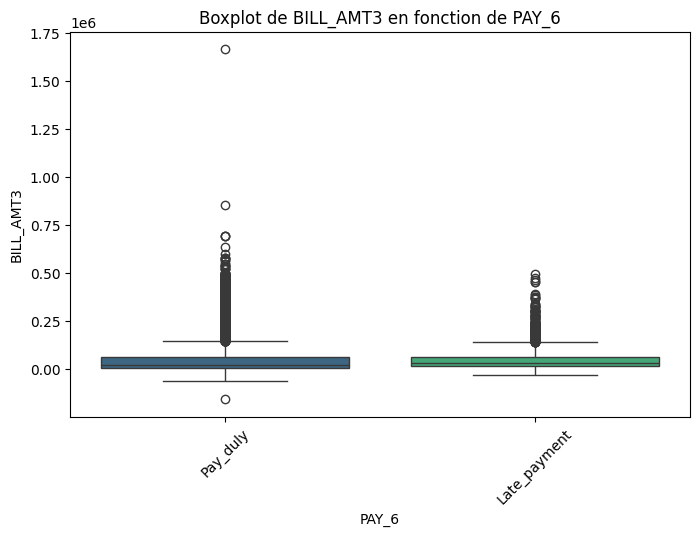

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


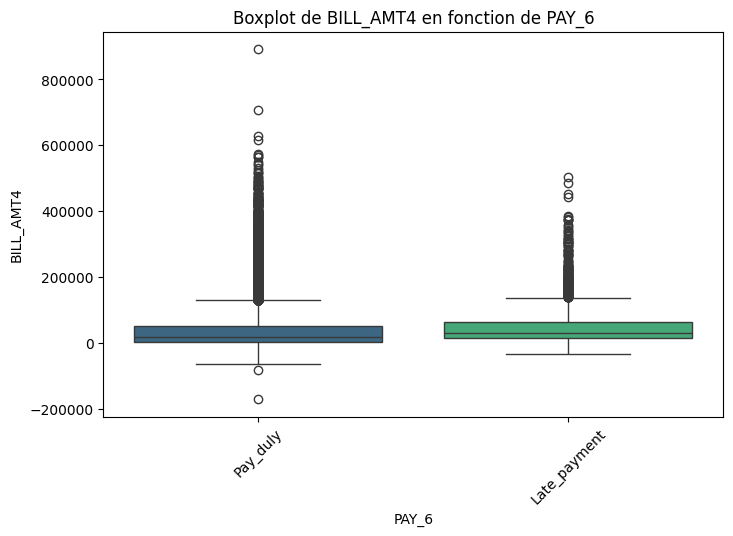

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


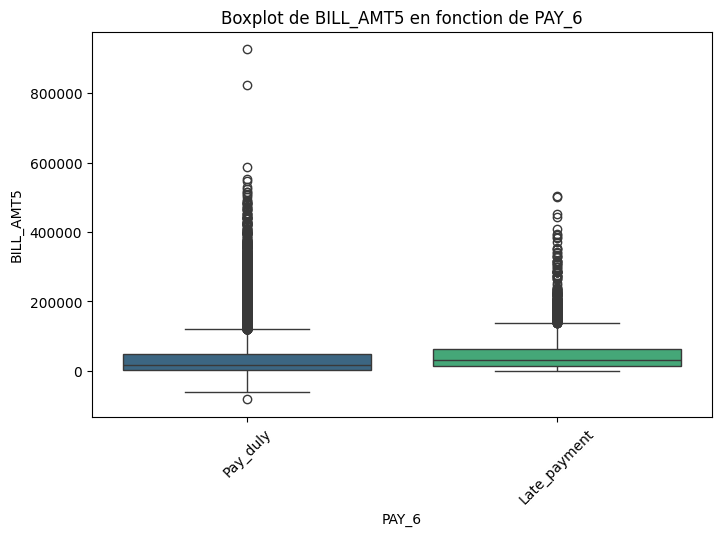

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


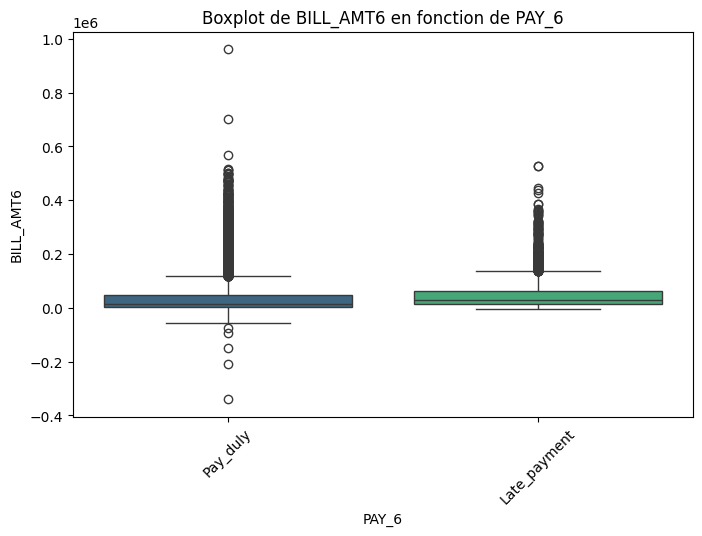

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


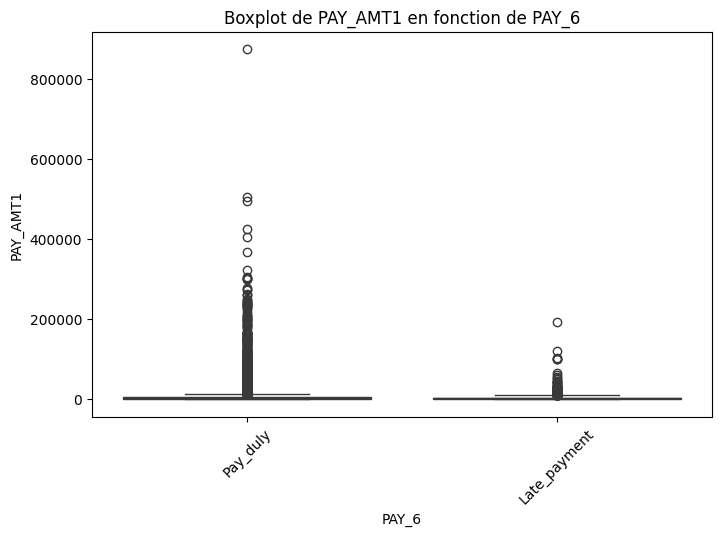

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


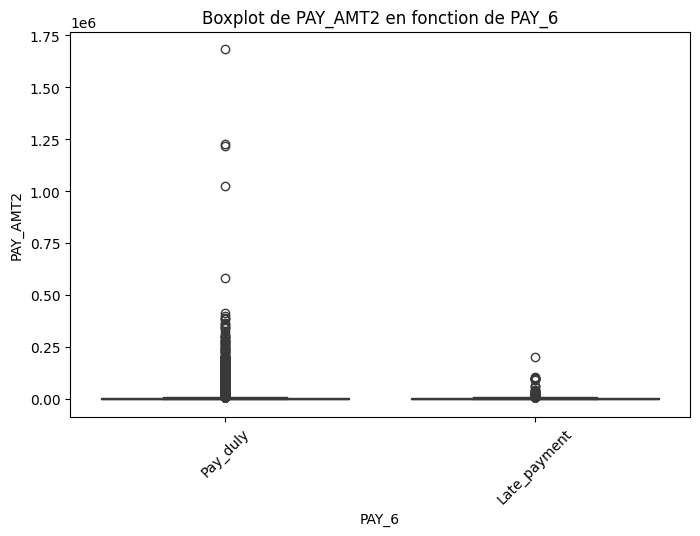

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


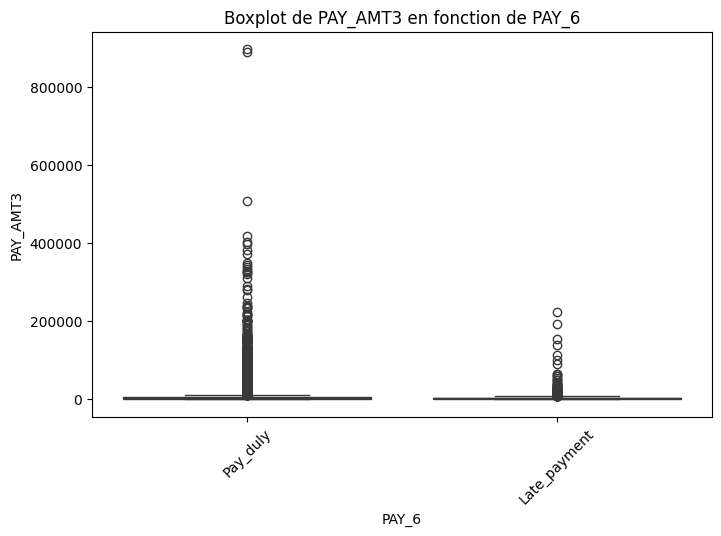

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


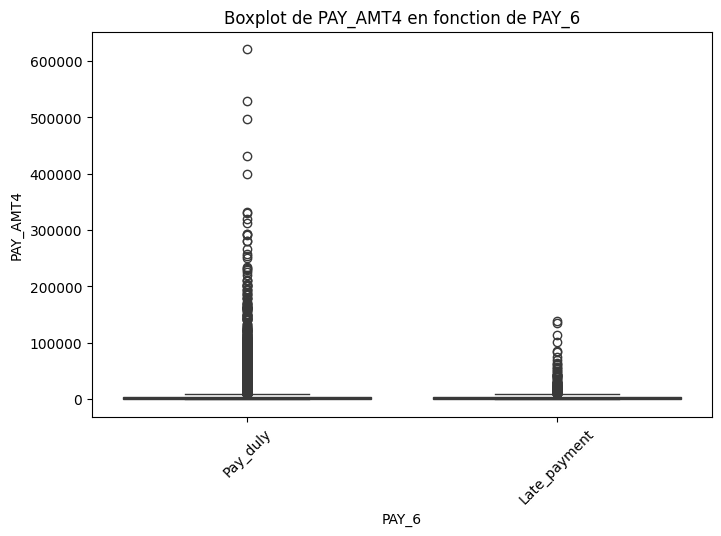

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


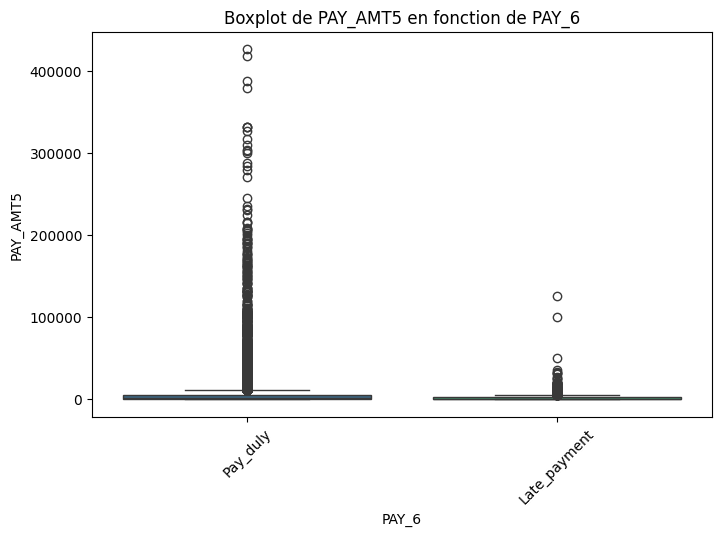

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


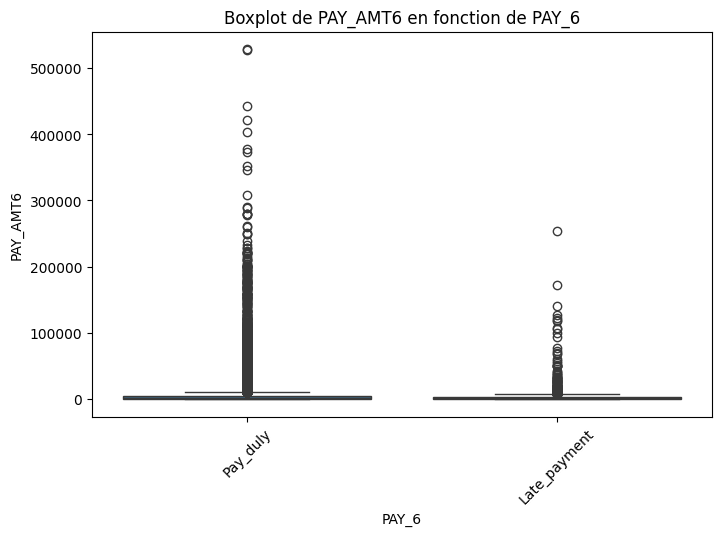

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


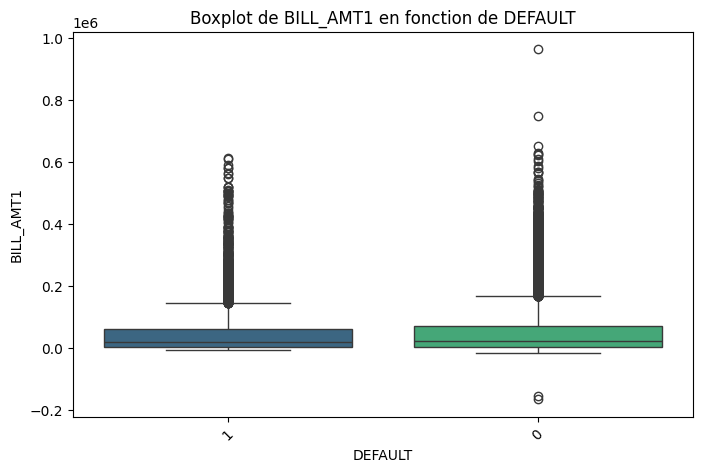

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


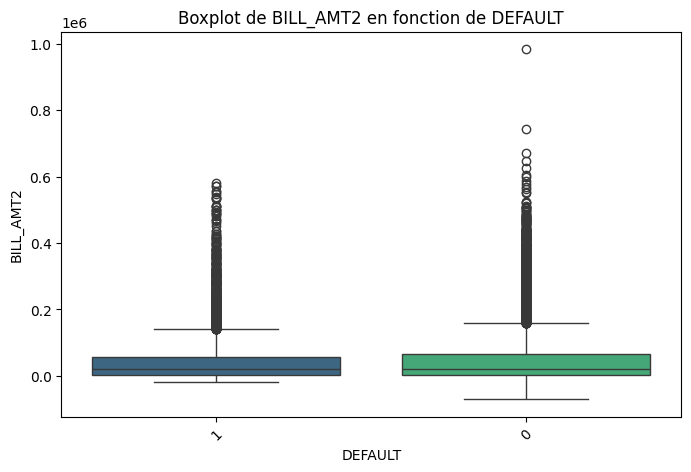

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


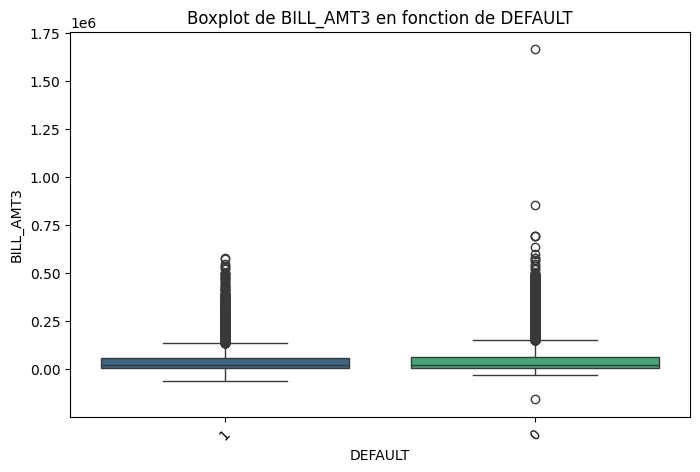

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


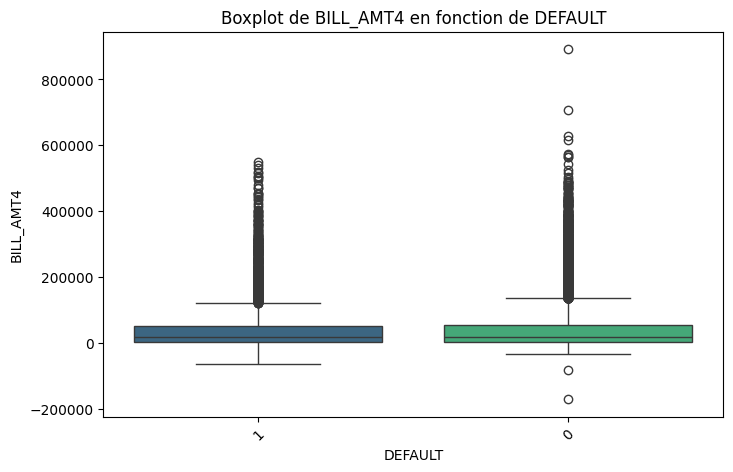

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


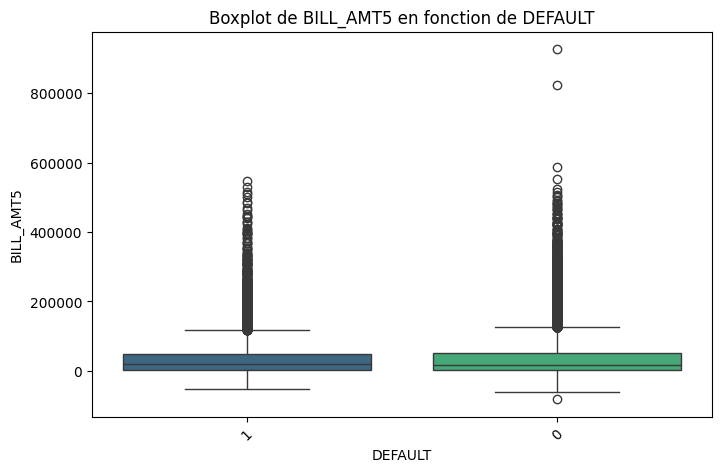

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


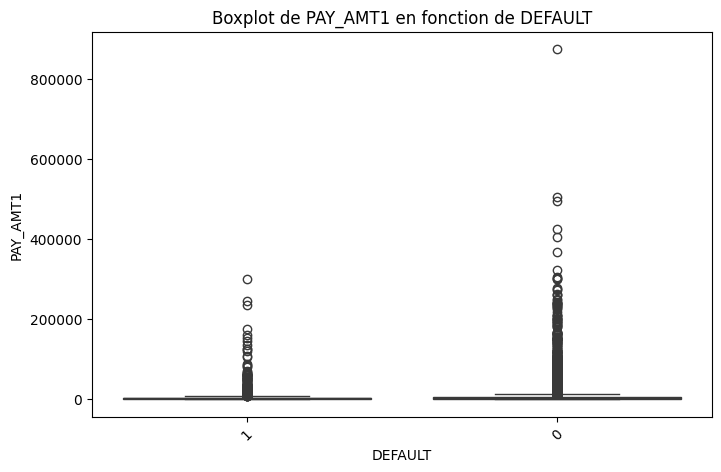

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


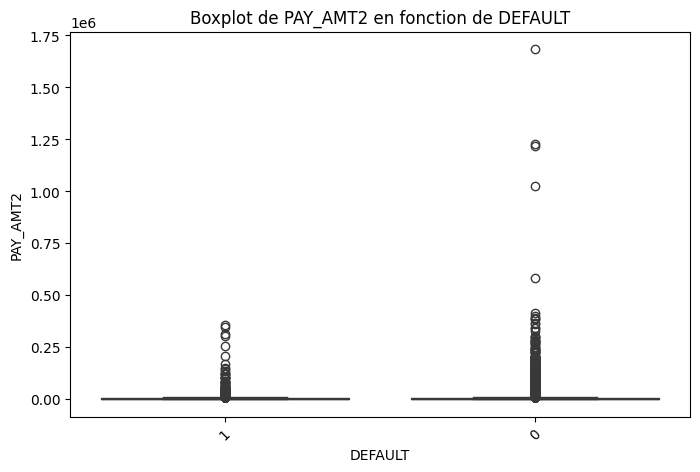

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


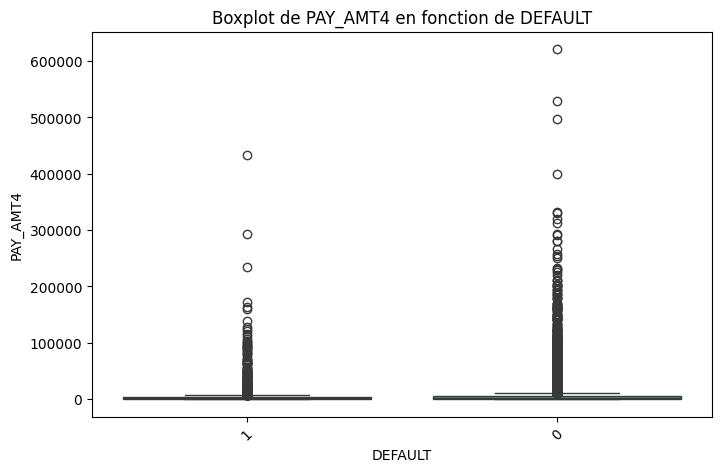

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


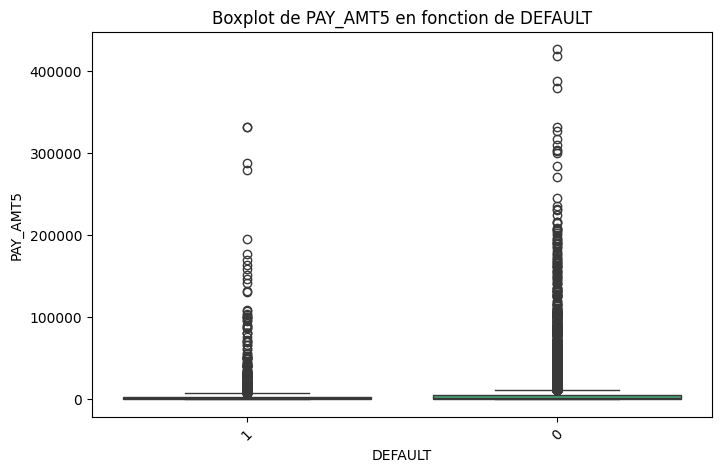

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


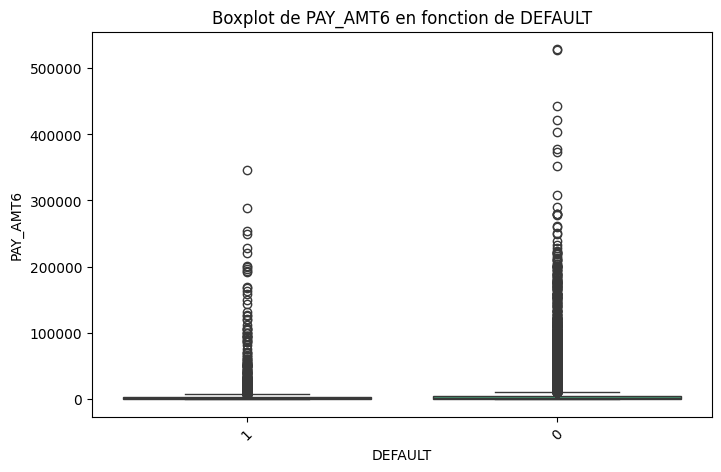

    Variable Catégorielle Variable Quantitative    Test Utilisé  \
14              EDUCATION             LIMIT_BAL  Kruskal-Wallis   
29               MARRIAGE                   AGE  Kruskal-Wallis   
15              EDUCATION                   AGE  Kruskal-Wallis   
56                  PAY_2             LIMIT_BAL          T-test   
70                  PAY_3             LIMIT_BAL          T-test   
..                    ...                   ...             ...   
73                  PAY_3             BILL_AMT2          T-test   
9                     SEX              PAY_AMT2          T-test   
101                 PAY_5             BILL_AMT2          T-test   
115                 PAY_6             BILL_AMT2          T-test   
8                     SEX              PAY_AMT1          T-test   

          p-valeur  p-valeur Normalité  
14    0.000000e+00        7.685549e-84  
29    0.000000e+00        3.376204e-70  
15   9.876770e-290        3.376204e-70  
56   8.498239e-268        7.685

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
tableau_resultats = quali_quanti_analysis(data, target="DEFAULT")
print(tableau_resultats)

# FEATURE SELECTION

In [43]:
X = data.drop("DEFAULT", axis=1)
y = data.DEFAULT

categorial_vars = X.select_dtypes(include=['object'])
numeric_vars = X.select_dtypes(include=['number'])

X[categorial_vars.columns] = X[categorial_vars.columns].astype(str)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorial_vars.columns)  # One-hot encoding pour les colonnes catégorielles
    ],
    remainder='passthrough'  # Laisser les autres colonnes inchangées
)


In [44]:
X_transformed = preprocessor.fit_transform(X)
X_transformed

array([[1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+03, 0.0000e+00,
        2.0000e+03],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        5.0000e+03],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.2000e+03, 2.0000e+03,
        3.1000e+03],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.9260e+03, 5.2964e+04,
        1.8040e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]])

In [46]:
# Récupérer les noms des nouvelles colonnes créées par OneHotEncoder
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorial_vars.columns)
# Fusionner avec les colonnes numériques originales
new_columns = list(onehot_columns) + list(X.select_dtypes(exclude=['object', 'category']).columns)
# Afficher les nouveaux noms de colonnes
new_columns

['SEX_2',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_Other',
 'MARRIAGE_2',
 'MARRIAGE_Other',
 'PAY_0_Pay_duly',
 'PAY_2_Pay_duly',
 'PAY_3_Pay_duly',
 'PAY_4_Pay_duly',
 'PAY_5_Pay_duly',
 'PAY_6_Pay_duly',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [47]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
X_train

array([[1.00e+00, 1.00e+00, 0.00e+00, ..., 6.10e+03, 1.23e+04, 6.10e+03],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 2.94e+02, 3.05e+02, 1.00e+03],
       ...,
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 2.00e+03, 1.20e+03, 1.00e+03],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [50]:
# Define Logistic Regression model
log_reg = LogisticRegression()

# Stepwise Feature Selection (Forward)
sfs = SFS(log_reg, 
          k_features='best',  # Automatically determine best feature count
          forward=True,       # Forward selection
          floating=False, 
          scoring='accuracy', 
          cv=5)  # 5-fold cross-validation

sfs = sfs.fit(X_train, y_train)

# Selected Features
selected_features = list(sfs.k_feature_idx_)
print(f"Selected Features: {selected_features}")

C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Selected Features: [1, 3, 4, 6, 7, 8, 11]


C:\Users\Lobélie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
print(np.array(new_columns)[selected_features])

['EDUCATION_2' 'EDUCATION_Other' 'MARRIAGE_2' 'PAY_0_Pay_duly'
 'PAY_2_Pay_duly' 'PAY_3_Pay_duly' 'PAY_6_Pay_duly']


In [58]:
# Train model with selected features
log_reg.fit(X_train[:, selected_features], y_train)
y_pred = log_reg.predict(X_test[:, selected_features])

# Model Accuracy
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")


Accuracy Score: 0.8058
